<a href="https://colab.research.google.com/github/NgocHa1301/Nckh2020/blob/master/An_Application_of_Deep_Reinforcement_Learning_to_Algorithmic_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Git Clone & Run

In [ ]:
!git clone https://github.com/ThibautTheate/An-Application-of-Deep-Reinforcement-Learning-to-Algorithmic-Trading.git

Cloning into 'An-Application-of-Deep-Reinforcement-Learning-to-Algorithmic-Trading'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 85 (delta 4), reused 81 (delta 3), pack-reused 0
Unpacking objects: 100% (85/85), done.


In [ ]:
%cd An-Application-of-Deep-Reinforcement-Learning-to-Algorithmic-Trading

/content/An-Application-of-Deep-Reinforcement-Learning-to-Algorithmic-Trading


In [ ]:
%ll
%mkdir Figures 

total 212
-rwxr-xr-x 1 root 36441 Mar 29 14:36 classicalStrategy.py*
drwxr-xr-x 2 root  4096 Mar 29 14:36 Data/
-rwxr-xr-x 1 root  8329 Mar 29 14:36 dataAugmentation.py*
-rwxr-xr-x 1 root  9698 Mar 29 14:36 dataDownloader.py*
-rwxr-xr-x 1 root  6730 Mar 29 14:36 fictiveStockGenerator.py*
-rwxr-xr-x 1 root  1641 Mar 29 14:36 main.py*
-rwxr-xr-x 1 root  1381 Mar 29 14:36 README.md*
-rwxr-xr-x 1 root   220 Mar 29 14:36 requirements.txt*
-rwxr-xr-x 1 root 47324 Mar 29 14:36 TDQN.py*
-rwxr-xr-x 1 root  4902 Mar 29 14:36 timeSeriesAnalyser.py*
-rwxr-xr-x 1 root 20927 Mar 29 14:36 tradingEnv.py*
-rwxr-xr-x 1 root 13570 Mar 29 14:36 tradingPerformance.py*
-rwxr-xr-x 1 root 32024 Mar 29 14:36 tradingSimulator.py*


In [ ]:
!python --version

Python 3.7.13


In [ ]:
!pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement python==3.7.4 (from versions: none)
ERROR: No matching distribution found for python==3.7.4


In [ ]:
!python main.py -strategy TDQN -stock Amazon

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Training progression (hardware selected => cuda:0):
100% 50/50 [19:28<00:00, 23.36s/it]
╒═══════════════════════════╤═════════╕
│   Performance Indicator   │  TDQN   │
╞═══════════════════════════╪═════════╡
│    Profit & Loss (P&L)    │ 922438  │
├───────────────────────────┼─────────┤
│     Annualized Return     │ 23.66%  │
├───────────────────────────┼─────────┤
│   Annualized Volatility   │ 28.77%  │
├───────────────────────────┼─────────┤
│       Sharpe Ratio        │  1.492  │
├───────────────────────────┼─────────┤
│       Sortino Ratio       │  2.451  │
├───────────────────────────┼─────────┤
│     Maximum Drawdown      │ 10.31%  │
├───────────────────────────┼─────────┤
│ Maximum Drawdown Duration │ 29 days │
├───────────────────────────┼─────────┤
│       Pro

# Reformat Flatten Code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/An-Application-of-Deep-Reinforcement-Learning-to-Algorithmic-Trading

%ls
!nvidia-smi

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/An-Application-of-Deep-Reinforcement-Learning-to-Algorithmic-Trading
classicalStrategy.py      main.py           TDQN.py
Data/                     __pycache__/      timeSeriesAnalyser.py
dataAugmentation.py       README.md         tradingEnv.py
dataDownloader.py         requirements.txt  tradingPerformance.py
fictiveStockGenerator.py  runs/             tradingSimulator.py
Figures/                  Strategies/
Thu Mar 31 15:32:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|  

In [ ]:
import argparse
import os
import sys
import importlib
import pickle
import itertools

import numpy as np
import pandas as pd

from tabulate import tabulate
from tqdm import tqdm
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import math
import random
import copy
import datetime

import numpy as np

from collections import deque
from tqdm import tqdm



import torch
import torch.nn as nn
import torch.optim as optim
import torch.autograd as autograd
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter

import gym
from io import StringIO
from scipy import signal

from mpl_toolkits.mplot3d import Axes3D
from abc import ABC, abstractmethod

import pandas_datareader as pdr
import requests


## Class Data Augmentation

In [ ]:
shiftRange = [0]
stretchRange = [1]
filterRange = [5]
noiseRange = [0]

In [ ]:
class DataAugmentation:
    """
    GOAL: Implementing some data augmentation techniques for stock time series.
    
    VARIABLES: /
                                
    METHODS:    - __init__: Initialization of some class variables.
                - shiftTimeSeries: Generate a new trading environment by simply
                                   shifting up or down the volume time series.
                - stretching: Generate a new trading environment by stretching
                              or contracting the original price time series.
                - noiseAddition: Generate a new trading environment by adding
                                 some noise to the original time series.
                - lowPassFilter: Generate a new trading environment by filtering
                                 (low-pass) the original time series.
                - generate: Generate a set of new trading environments based on the
                            data augmentation techniques implemented.       
    """
    
    def shiftTimeSeries(self, tradingEnv, shiftMagnitude=0):
        """
        GOAL: Generate a new trading environment by simply shifting up or down
              the volume time series.
        
        INPUTS: - tradingEnv: Original trading environment to augment.
                - shiftMagnitude: Magnitude of the shift.
        
        OUTPUTS: - newTradingEnv: New trading environment generated.
        """

        # Creation of the new trading environment
        newTradingEnv = copy.deepcopy(tradingEnv)

        # Constraint on the shift magnitude
        if shiftMagnitude < 0:
            minValue = np.min(tradingEnv.data['Volume'])
            shiftMagnitude = max(-minValue, shiftMagnitude)
        
        # Shifting of the volume time series
        newTradingEnv.data['Volume'] += shiftMagnitude

        # Return the new trading environment generated
        return newTradingEnv


    def streching(self, tradingEnv, factor=1):
        """
        GOAL: Generate a new trading environment by stretching
              or contracting the original price time series, by 
              multiplying the returns by a certain factor.
        
        INPUTS: - tradingEnv: Original trading environment to augment.
                - factor: Stretching/contraction factor.
        
        OUTPUTS: - newTradingEnv: New trading environment generated.
        """

        # Creation of the new trading environment
        newTradingEnv = copy.deepcopy(tradingEnv)

        # Application of the stretching/contraction operation
        returns = newTradingEnv.data['Close'].pct_change() * factor
        for i in range(1, len(newTradingEnv.data.index)):
            newTradingEnv.data['Close'][i] = newTradingEnv.data['Close'][i-1] * (1 + returns[i])
            newTradingEnv.data['Low'][i] = newTradingEnv.data['Close'][i] * tradingEnv.data['Low'][i]/tradingEnv.data['Close'][i]
            newTradingEnv.data['High'][i] = newTradingEnv.data['Close'][i] * tradingEnv.data['High'][i]/tradingEnv.data['Close'][i]
            newTradingEnv.data['Open'][i] = newTradingEnv.data['Close'][i-1]

        # Return the new trading environment generated
        return newTradingEnv


    def noiseAddition(self, tradingEnv, stdev=1):
        """
        GOAL: Generate a new trading environment by adding some gaussian
              random noise to the original time series.
        
        INPUTS: - tradingEnv: Original trading environment to augment.
                - stdev: Standard deviation of the generated white noise.
        
        OUTPUTS: - newTradingEnv: New trading environment generated.
        """

        # Creation of a new trading environment
        newTradingEnv = copy.deepcopy(tradingEnv)

        # Generation of the new noisy time series
        for i in range(1, len(newTradingEnv.data.index)):
            # Generation of artificial gaussian random noises
            price = newTradingEnv.data['Close'][i]
            volume = newTradingEnv.data['Volume'][i]
            priceNoise = np.random.normal(0, stdev*(price/100))
            volumeNoise = np.random.normal(0, stdev*(volume/100))

            # Addition of the artificial noise generated
            newTradingEnv.data['Close'][i] *= (1 + priceNoise/100)
            newTradingEnv.data['Low'][i] *= (1 + priceNoise/100)
            newTradingEnv.data['High'][i] *= (1 + priceNoise/100)
            newTradingEnv.data['Volume'][i] *= (1 + volumeNoise/100)
            newTradingEnv.data['Open'][i] = newTradingEnv.data['Close'][i-1]

        # Return the new trading environment generated
        return newTradingEnv


    def lowPassFilter(self, tradingEnv, order=5):
        """
        GOAL: Generate a new trading environment by filtering
              (low-pass filter) the original time series.
        
        INPUTS: - tradingEnv: Original trading environment to augment.
                - order: Order of the filtering operation.
        
        OUTPUTS: - newTradingEnv: New trading environment generated.
        """

        # Creation of a new trading environment
        newTradingEnv = copy.deepcopy(tradingEnv)

        # Application of a filtering (low-pass) operation
        newTradingEnv.data['Close'] = newTradingEnv.data['Close'].rolling(window=order).mean()
        newTradingEnv.data['Low'] = newTradingEnv.data['Low'].rolling(window=order).mean()
        newTradingEnv.data['High'] = newTradingEnv.data['High'].rolling(window=order).mean()
        newTradingEnv.data['Volume'] = newTradingEnv.data['Volume'].rolling(window=order).mean()
        for i in range(order):
            newTradingEnv.data['Close'][i] = tradingEnv.data['Close'][i]
            newTradingEnv.data['Low'][i] = tradingEnv.data['Low'][i]
            newTradingEnv.data['High'][i] = tradingEnv.data['High'][i]
            newTradingEnv.data['Volume'][i] = tradingEnv.data['Volume'][i]
        newTradingEnv.data['Open'] = newTradingEnv.data['Close'].shift(1)
        newTradingEnv.data['Open'][0] = tradingEnv.data['Open'][0]

        # Return the new trading environment generated
        return newTradingEnv


    def generate(self, tradingEnv):
        """
        Generate a set of new trading environments based on the data
        augmentation techniques implemented.
        
        :param: - tradingEnv: Original trading environment to augment.
        
        :return: - tradingEnvList: List of trading environments generated
                                   by data augmentation techniques.
        """

        # Application of the data augmentation techniques to generate the new trading environments
        tradingEnvList = []
        for shift in shiftRange:
            tradingEnvShifted = self.shiftTimeSeries(tradingEnv, shift)
            for stretch in stretchRange:
                tradingEnvStretched = self.streching(tradingEnvShifted, stretch)
                for order in filterRange:
                    tradingEnvFiltered = self.lowPassFilter(tradingEnvStretched, order)
                    for noise in noiseRange:
                        tradingEnvList.append(self.noiseAddition(tradingEnvFiltered, noise))
        return tradingEnvList

## Class Performance Estimator

In [ ]:
class PerformanceEstimator:
    """
    GOAL: Accurately estimating the performance of a trading strategy, by
          computing many different performance indicators.
        
    VARIABLES: - data: Trading activity data from the trading environment.
               - PnL: Profit & Loss (performance indicator).
               - annualizedReturn: Annualized Return (performance indicator).
               - annualizedVolatily: Annualized Volatility (performance indicator).
               - profitability: Profitability (performance indicator).
               - averageProfitLossRatio: Average Profit/Loss Ratio (performance indicator).
               - sharpeRatio: Sharpe Ratio (performance indicator).
               - sortinoRatio: Sortino Ratio (performance indicator).
               - maxDD: Maximum Drawdown (performance indicator).
               - maxDDD: Maximum Drawdown Duration (performance indicator).
               - skewness: Skewness of the returns (performance indicator).
          
    METHODS:   -  __init__: Object constructor initializing some class variables. 
               - computePnL: Compute the P&L.
               - computeAnnualizedReturn: Compute the Annualized Return.
               - computeAnnualizedVolatility: Compute the Annualized Volatility.
               - computeProfitability: Computate both the Profitability and the Average Profit/Loss Ratio.
               - computeSharpeRatio: Compute the Sharpe Ratio.
               - computeSortinoRatio: Compute the Sortino Ratio.
               - computeMaxDrawdown: Compute both the Maximum Drawdown and Maximum Drawdown Duration.
               - computeSkewness: Compute the Skewness of the returns.
               - computePerformance: Compute all the performance indicators.
               - displayPerformance: Display the entire set of performance indicators in a table.
    """

    def __init__(self, tradingData):
        """
        GOAL: Object constructor initializing the class variables. 
        
        INPUTS: - tradingData: Trading data from the trading strategy execution.
        
        OUTPUTS: /
        """

        self.data = tradingData


    def computePnL(self):
        """
        GOAL: Compute the Profit & Loss (P&L) performance indicator, which
              quantifies the money gained or lost during the trading activity.
        
        INPUTS: /
        
        OUTPUTS:    - PnL: Profit or loss (P&L) performance indicator.
        """
        
        # Compute the PnL
        self.PnL = self.data["Money"][-1] - self.data["Money"][0]
        return self.PnL
    

    def computeAnnualizedReturn(self):
        """
        GOAL: Compute the yearly average profit or loss (in %), called
              the Annualized Return performance indicator.
        
        INPUTS: /
        
        OUTPUTS:    - annualizedReturn: Annualized Return performance indicator.
        """
        
        # Compute the cumulative return over the entire trading horizon
        cumulativeReturn = self.data['Returns'].cumsum()
        cumulativeReturn = cumulativeReturn[-1]
        
        # Compute the time elapsed (in days)
        start = self.data.index[0].to_pydatetime()
        end = self.data.index[-1].to_pydatetime()     
        timeElapsed = end - start
        timeElapsed = timeElapsed.days

        # Compute the Annualized Return
        if(cumulativeReturn > -1):
            self.annualizedReturn = 100 * (((1 + cumulativeReturn) ** (365/timeElapsed)) - 1)
        else:
            self.annualizedReturn = -100
        return self.annualizedReturn
    
    
    def computeAnnualizedVolatility(self):
        """
        GOAL: Compute the Yearly Voltility of the returns (in %), which is
              a measurement of the risk associated with the trading activity.
        
        INPUTS: /
        
        OUTPUTS:    - annualizedVolatily: Annualized Volatility performance indicator.
        """
        
        # Compute the Annualized Volatility (252 trading days in 1 trading year)
        self.annualizedVolatily = 100 * np.sqrt(252) * self.data['Returns'].std()
        return self.annualizedVolatily
    
    
    def computeSharpeRatio(self, riskFreeRate=0):
        """
        GOAL: Compute the Sharpe Ratio of the trading activity, which is one of
              the most suited performance indicator as it balances the brute
              performance and the risk associated with a trading activity.
        
        INPUTS:     - riskFreeRate: Return of an investment with a risk null.
        
        OUTPUTS:    - sharpeRatio: Sharpe Ratio performance indicator.
        """
        
        # Compute the expected return
        expectedReturn = self.data['Returns'].mean()
        
        # Compute the returns volatility
        volatility = self.data['Returns'].std()
        
        # Compute the Sharpe Ratio (252 trading days in 1 year)
        if expectedReturn != 0 and volatility != 0:
            self.sharpeRatio = np.sqrt(252) * (expectedReturn - riskFreeRate)/volatility
        else:
            self.sharpeRatio = 0
        return self.sharpeRatio
    
    
    def computeSortinoRatio(self, riskFreeRate=0):
        """
        GOAL: Compute the Sortino Ratio of the trading activity, which is similar
              to the Sharpe Ratio but does no longer penalize positive risk.
        
        INPUTS:     - riskFreeRate: Return of an investment with a risk null.
        
        OUTPUTS:    - sortinoRatio: Sortino Ratio performance indicator.
        """
        
        # Compute the expected return
        expectedReturn = np.mean(self.data['Returns'])
        
        # Compute the negative returns volatility
        negativeReturns = [returns for returns in self.data['Returns'] if returns < 0]
        volatility = np.std(negativeReturns)
        
        # Compute the Sortino Ratio (252 trading days in 1 year)
        if expectedReturn != 0 and volatility != 0:
            self.sortinoRatio = np.sqrt(252) * (expectedReturn - riskFreeRate)/volatility
        else:
            self.sortinoRatio = 0
        return self.sortinoRatio
    
    
    def computeMaxDrawdown(self, plotting=False):
        """
        GOAL: Compute both the Maximum Drawdown and the Maximum Drawdown Duration
              performance indicators of the trading activity, which are measurements
              of the risk associated with the trading activity.
        
        INPUTS: - plotting: Boolean enabling the maximum drawdown plotting.
        
        OUTPUTS:    - maxDD: Maximum Drawdown performance indicator.
                    - maxDDD: Maximum Drawdown Duration performance indicator.
        """

        # Compute both the Maximum Drawdown and Maximum Drawdown Duration
        capital = self.data['Money'].values
        through = np.argmax(np.maximum.accumulate(capital) - capital)
        if through != 0:
            peak = np.argmax(capital[:through])
            self.maxDD = 100 * (capital[peak] - capital[through])/capital[peak]
            self.maxDDD = through - peak
        else:
            self.maxDD = 0
            self.maxDDD = 0
            return self.maxDD, self.maxDDD

        # Plotting of the Maximum Drawdown if required
        if plotting:
            plt.figure(figsize=(10, 4))
            plt.plot(self.data['Money'], lw=2, color='Blue')
            plt.plot([self.data.iloc[[peak]].index, self.data.iloc[[through]].index],
                     [capital[peak], capital[through]], 'o', color='Red', markersize=5)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.savefig(''.join(['Figures/', 'MaximumDrawDown', '.png']))
            #plt.show()

        # Return of the results
        return self.maxDD, self.maxDDD
    

    def computeProfitability(self):
        """
        GOAL: Compute both the percentage of trades that resulted
              in profit (Profitability), and the ratio between the
              average profit and the average loss (AverageProfitLossRatio).
        
        INPUTS: /
        
        OUTPUTS:    - profitability: Percentage of trades that resulted in profit.
                    - averageProfitLossRatio: Ratio between the average profit
                                              and the average loss.
        """
        
        # Initialization of some variables
        good = 0
        bad = 0
        profit = 0
        loss = 0
        index = next((i for i in range(len(self.data.index)) if self.data['Action'][i] != 0), None)
        if index == None:
            self.profitability = 0
            self.averageProfitLossRatio = 0
            return self.profitability, self.averageProfitLossRatio
        money = self.data['Money'][index]

        # Monitor the success of each trade over the entire trading horizon
        for i in range(index+1, len(self.data.index)):
            if(self.data['Action'][i] != 0):
                delta = self.data['Money'][i] - money
                money = self.data['Money'][i]
                if(delta >= 0):
                    good += 1
                    profit += delta
                else:
                    bad += 1
                    loss -= delta

        # Special case of the termination trade
        delta = self.data['Money'][-1] - money
        if(delta >= 0):
            good += 1
            profit += delta
        else:
            bad += 1
            loss -= delta

        # Compute the Profitability
        self.profitability = 100 * good/(good + bad)
         
        # Compute the ratio average Profit/Loss  
        if(good != 0):
            profit /= good
        if(bad != 0):
            loss /= bad
        if(loss != 0):
            self.averageProfitLossRatio = profit/loss
        else:
            self.averageProfitLossRatio = float('Inf')

        return self.profitability, self.averageProfitLossRatio
        

    def computeSkewness(self):
        """
        GOAL: Compute the skewness of the returns, which is
              a measurement of the degree of distorsion
              from the symmetrical bell curve.
        
        INPUTS: /
        
        OUTPUTS:    - skewness: Skewness performance indicator.
        """
        
        # Compute the Skewness of the returns
        self.skewness = self.data["Returns"].skew()
        return self.skewness
        
    
    def computePerformance(self):
        """
        GOAL: Compute the entire set of performance indicators.
        
        INPUTS: /
        
        OUTPUTS:    - performanceTable: Table summarizing the performance of 
                                        a trading strategy.
        """
    
        # Compute the entire set of performance indicators
        self.computePnL()
        self.computeAnnualizedReturn()
        self.computeAnnualizedVolatility()
        self.computeProfitability()
        self.computeSharpeRatio()
        self.computeSortinoRatio()
        self.computeMaxDrawdown()
        self.computeSkewness()

        # Generate the performance table
        self.performanceTable = [["Profit & Loss (P&L)", "{0:.0f}".format(self.PnL)], 
                                 ["Annualized Return", "{0:.2f}".format(self.annualizedReturn) + '%'],
                                 ["Annualized Volatility", "{0:.2f}".format(self.annualizedVolatily) + '%'],
                                 ["Sharpe Ratio", "{0:.3f}".format(self.sharpeRatio)],
                                 ["Sortino Ratio", "{0:.3f}".format(self.sortinoRatio)],
                                 ["Maximum Drawdown", "{0:.2f}".format(self.maxDD) + '%'],
                                 ["Maximum Drawdown Duration", "{0:.0f}".format(self.maxDDD) + ' days'],
                                 ["Profitability", "{0:.2f}".format(self.profitability) + '%'],
                                 ["Ratio Average Profit/Loss", "{0:.3f}".format(self.averageProfitLossRatio)],
                                 ["Skewness", "{0:.3f}".format(self.skewness)]]
        
        return self.performanceTable


    def displayPerformance(self, name):
        """
        GOAL: Compute and display the entire set of performance indicators
              in a table.
        
        INPUTS: - name: Name of the element (strategy or stock) analysed.
        
        OUTPUTS:    - performanceTable: Table summarizing the performance of 
                                        a trading activity.
        """
        
        # Generation of the performance table
        self.computePerformance()
        
        # Display the table in the console (Tabulate for the beauty of the print operation)
        headers = ["Performance Indicator", name]
        tabulation = tabulate(self.performanceTable, headers, tablefmt="fancy_grid", stralign="center")
        print(tabulation)

## Data preparation

In [ ]:
class AlphaVantage:
    """
    GOAL: Downloading stock market data from the Alpha Vantage API. See the
          AlphaVantage documentation for more information.
    
    VARIABLES:  - link: Link to the Alpha Vantage website.
                - apikey: Key required to access the Alpha Vantage API.
                - datatype: 'csv' or 'json' data format.
                - outputsize: 'full' or 'compact' (only 100 time steps).
                - data: Pandas dataframe containing the stock market data.
                                
    METHODS:    - __init__: Object constructor initializing some variables.
                - getDailyData: Retrieve daily stock market data.
                - getIntradayData: Retrieve intraday stock market data.
                - processDataframe: Process the dataframe to homogenize the format.
    """

    def __init__(self):
        """
        GOAL: Object constructor initializing the class variables. 
        
        INPUTS: /      
        
        OUTPUTS: /
        """
        
        self.link = 'https://www.alphavantage.co/query'
        self.apikey = 'APIKEY'
        self.datatype = 'csv'
        self.outputsize = 'full'
        self.data = pd.DataFrame()
        
        
    def getDailyData(self, marketSymbol, startingDate, endingDate):
        """
        GOAL: Downloading daily stock market data from the Alpha Vantage API. 
        
        INPUTS:     - marketSymbol: Stock market symbol.
                    - startingDate: Beginning of the trading horizon.
                    - endingDate: Ending of the trading horizon.
          
        OUTPUTS:    - data: Pandas dataframe containing the stock market data.
        """
        
        # Send an HTTP request to the Alpha Vantage API
        payload = {'function': 'TIME_SERIES_DAILY_ADJUSTED', 'symbol': marketSymbol, 
                   'outputsize': self.outputsize, 'datatype': self.datatype, 
                   'apikey': self.apikey}
        response = requests.get(self.link, params=payload)
        
        # Process the CSV file retrieved
        csvText = StringIO(response.text)
        data = pd.read_csv(csvText, index_col='timestamp')
        
        # Process the dataframe to homogenize the output format
        self.data = self.processDataframe(data)
        if(startingDate != 0 and endingDate != 0):
            self.data = self.data.loc[startingDate:endingDate]

        return self.data
        
        
    def getIntradayData(self, marketSymbol, startingDate, endingDate, timePeriod=60):
        """
        GOAL: Downloading intraday stock market data from the Alpha Vantage API. 
        
        INPUTS:     - marketSymbol: Stock market symbol. 
                    - startingDate: Beginning of the trading horizon.
                    - endingDate: Ending of the trading horizon.
                    - timePeriod: Time step of the stock market data (in seconds).
          
        OUTPUTS:    - data: Pandas dataframe containing the stock market data.
        """
        
        # Round the timePeriod value to the closest accepted value
        possiblePeriods = [1, 5, 15, 30, 60]
        timePeriod = min(possiblePeriods, key=lambda x:abs(x-timePeriod))
        
        # Send a HTTP request to the AlphaVantage API
        payload = {'function': 'TIME_SERIES_INTRADAY', 'symbol': marketSymbol, 
                   'outputsize': self.outputsize, 'datatype': self.datatype, 
                   'apikey': self.apikey, 'interval': str(timePeriod)+'min'}
        response = requests.get(self.link, params=payload)
        
        # Process the CSV file retrieved
        csvText = StringIO(response.text)
        data = pd.read_csv(csvText, index_col='timestamp')
        
        # Process the dataframe to homogenize the output format
        self.data = self.processDataframe(data)
        if(startingDate != 0 and endingDate != 0):
            self.data = self.data.loc[startingDate:endingDate]

        return self.data
    
    
    def processDataframe(self, dataframe):
        """
        GOAL: Process a downloaded dataframe to homogenize the output format.
        
        INPUTS:     - dataframe: Pandas dataframe to be processed.
          
        OUTPUTS:    - dataframe: Processed Pandas dataframe.
        """
        
        # Reverse the order of the dataframe (chronological order)
        dataframe = dataframe[::-1]

        # Remove useless columns
        dataframe['close'] = dataframe['adjusted_close']
        del dataframe['adjusted_close']
        del dataframe['dividend_amount']
        del dataframe['split_coefficient']
        
        # Adapt the dataframe index and column names
        dataframe.index.names = ['Timestamp']
        dataframe = dataframe.rename(index=str, columns={"open": "Open",
                                                         "high": "High", 
                                                         "low": "Low",
                                                         "close": "Close",
                                                         "volume": "Volume"})
        # Adjust the format of the index values
        dataframe.index = dataframe.index.map(pd.Timestamp)

        return dataframe



###############################################################################
########################### Class YahooFinance ################################
###############################################################################

class YahooFinance:   
    """
    GOAL: Downloading stock market data from the Yahoo Finance API. See the
          pandas.datareader documentation for more information.
    
    VARIABLES:  - data: Pandas dataframe containing the stock market data.
                                
    METHODS:    - __init__: Object constructor initializing some variables.
                - getDailyData: Retrieve daily stock market data.
                - processDataframe: Process a dataframe to homogenize the
                                    output format.
    """
    

    def __init__(self):
        """
        GOAL: Object constructor initializing the class variables. 
        
        INPUTS: /      
        
        OUTPUTS: /
        """
        
        self.data = pd.DataFrame()

    
    def getDailyData(self, marketSymbol, startingDate, endingDate):
        """
        GOAL: Downloding daily stock market data from the Yahoo Finance API. 
        
        INPUTS:     - marketSymbol: Stock market symbol.
                    - startingDate: Beginning of the trading horizon.
                    - endingDate: Ending of the trading horizon.
          
        OUTPUTS:    - data: Pandas dataframe containing the stock market data.
        """
        
        data = pdr.data.DataReader(marketSymbol, 'yahoo', startingDate, endingDate)
        self.data = self.processDataframe(data)
        return self.data


    def processDataframe(self, dataframe):
        """
        GOAL: Process a downloaded dataframe to homogenize the output format.
        
        INPUTS:     - dataframe: Pandas dataframe to be processed.
          
        OUTPUTS:    - dataframe: Processed Pandas dataframe.
        """
        
        # Remove useless columns
        dataframe['Close'] = dataframe['Adj Close']
        del dataframe['Adj Close']
        
        # Adapt the dataframe index and column names
        dataframe.index.names = ['Timestamp']
        dataframe = dataframe[['Open', 'High', 'Low', 'Close', 'Volume']]

        return dataframe


    
###############################################################################
############################# Class CSVHandler ################################
###############################################################################
    
class CSVHandler:
    """
    GOAL: Converting "Pandas dataframe" <-> "CSV file" (bidirectional).
    
    VARIABLES: /
                                
    METHODS:    - dataframeToCSV: Saving a dataframe into a CSV file.
                - CSVToDataframe: Loading a CSV file into a dataframe.
    """
    
    
    def dataframeToCSV(self, name, dataframe):
        """
        GOAL: Saving a dataframe into a CSV file.
        
        INPUTS:     - name: Name of the CSV file.   
                    - dataframe: Pandas dataframe to be saved.
          
        OUTPUTS: /
        """
        
        path = name + '.csv'
        dataframe.to_csv(path)
        
        
    def CSVToDataframe(self, name):
        """
        GOAL: Loading a CSV file into a dataframe.
        
        INPUTS:     - name: Name of the CSV file.   
          
        OUTPUTS:    - dataframe: Pandas dataframe loaded.
        """
        
        path = name + '.csv'
        return pd.read_csv(path,
                           header=0,
                           index_col='Timestamp',
                           parse_dates=True)

In [ ]:
MIN = 100
MAX = 200
PERIOD = 252

In [ ]:
class StockGenerator:
    """
    GOAL: Generation of some fictive stock market curves
          (linear, sinusoidal, triangle, etc.).
        
    VARIABLES: /
          
    METHODS: - linearUp: Generate a continuously increasing linear curve.
             - linearDown: Generate a continuously decreasing linear curve.
             - sinusoidal: Generate a (periodic) sinusoidal signal curve.
             - triangle: Generate a (periodic) triangle signal curve.
    """

    def linearUp (self, startingDate, endingDate, minValue=MIN, maxValue=MAX):
        """
        GOAL: Generate a new fictive stock market as a continuously increasing
              linear curve.
        
        INPUTS: - startingDate: Beginning of the trading horizon.  
                - endingDate: Ending of the trading horizon.
                - minValue: Minimum price value.   
                - maxValue: Maximum price value.    
        
        OUTPUTS: - linearUpward: Generated fictive stock market dataframe.
        """

        # Initialization of the new stock market dataframe
        downloader = YahooFinance()
        DowJones = downloader.getDailyData('DIA', startingDate, endingDate)
        linearUpward = pd.DataFrame(index=DowJones.index)

        # Generation of the fictive prices over the trading horizon
        length = len(linearUpward.index)
        prices = np.linspace(minValue, maxValue, num=length)

        # Filling of the new fictive stock market dataframe
        linearUpward['Open'] = prices
        linearUpward['High'] = prices 
        linearUpward['Low'] = prices
        linearUpward['Close'] = prices 
        linearUpward['Volume'] = 100000

        return linearUpward

    
    def linearDown (self, startingDate, endingDate, minValue=MIN, maxValue=MAX):
        """
        GOAL: Generate a new fictive stock market as a continuously decreasing
              linear curve.
        
        INPUTS: - startingDate: Beginning of the trading horizon.  
                - endingDate: Ending of the trading horizon.
                - minValue: Minimum price value.   
                - maxValue: Maximum price value.    
        
        OUTPUTS: - linearDownward: Generated fictive stock market dataframe.
        """

        # Initialization of the new stock market dataframe
        downloader = YahooFinance()
        DowJones = downloader.getDailyData('DIA', startingDate, endingDate)
        linearDownward = pd.DataFrame(index=DowJones.index)

        # Generation of the fictive prices over the trading horizon
        length = len(linearDownward.index)
        prices = np.linspace(minValue, maxValue, num=length)
        prices = np.flip(prices)

        # Filling of the new fictive stock market dataframe
        linearDownward['Open'] = prices
        linearDownward['High'] = prices 
        linearDownward['Low'] = prices
        linearDownward['Close'] = prices 
        linearDownward['Volume'] = 100000

        return linearDownward

    
    def sinusoidal(self, startingDate, endingDate, minValue=MIN, maxValue=MAX, period=PERIOD):
        """
        GOAL: Generate a new fictive stock market as a sinusoidal signal curve.
        
        INPUTS: - startingDate: Beginning of the trading horizon.  
                - endingDate: Ending of the trading horizon.
                - minValue: Minimum price value.   
                - maxValue: Maximum price value.  
                - period: Period of the sinusoidal signal.  
        
        OUTPUTS: - sinusoidal: Generated fictive stock market dataframe.
        """

        # Initialization of the new stock market dataframe
        downloader = YahooFinance()
        DowJones = downloader.getDailyData('DIA', startingDate, endingDate)
        sinusoidal = pd.DataFrame(index=DowJones.index)

        # Generation of the fictive prices over the trading horizon
        length = len(sinusoidal.index)
        t = np.linspace(0, length, num=length)
        prices = minValue + maxValue / 2 * (np.sin(2 * np.pi * t / period) + 1) / 2

        # Filling of the new fictive stock market dataframe
        sinusoidal['Open'] = prices
        sinusoidal['High'] = prices 
        sinusoidal['Low'] = prices
        sinusoidal['Close'] = prices 
        sinusoidal['Volume'] = 100000

        return sinusoidal

    
    def triangle(self, startingDate, endingDate, minValue=MIN, maxValue=MAX, period=PERIOD):
        """
        GOAL: Generate a new fictive stock market as a triangle signal curve.
        
        INPUTS: - startingDate: Beginning of the trading horizon.  
                - endingDate: Ending of the trading horizon.
                - minValue: Minimum price value.   
                - maxValue: Maximum price value.  
                - period: Period of the triangle signal.  
        
        OUTPUTS: - triangle: Generated fictive stock market dataframe.
        """

        # Initialization of the new stock market dataframe
        downloader = YahooFinance()
        DowJones = downloader.getDailyData('DIA', startingDate, endingDate)
        triangle = pd.DataFrame(index=DowJones.index)

        # Generation of the fictive prices over the trading horizon
        length = len(triangle.index)
        t = np.linspace(0, length, num=length)
        prices = minValue + maxValue / 2 * np.abs(signal.sawtooth(2 * np.pi * t / period))

        # Filling of the new fictive stock market dataframe
        triangle['Open'] = prices
        triangle['High'] = prices 
        triangle['Low'] = prices
        triangle['Close'] = prices 
        triangle['Volume'] = 100000

        return triangle

## Class Trading Environment

In [ ]:
# Boolean handling the saving of the stock market data downloaded
saving = True

# Variable related to the fictive stocks supported
fictiveStocks = ('LINEARUP', 'LINEARDOWN', 'SINUSOIDAL', 'TRIANGLE')

In [ ]:
class TradingEnv(gym.Env):
    """
    GOAL: Implement a custom trading environment compatible with OpenAI Gym.
    
    VARIABLES:  - data: Dataframe monitoring the trading activity.
                - state: RL state to be returned to the RL agent.
                - reward: RL reward to be returned to the RL agent.
                - done: RL episode termination signal.
                - t: Current trading time step.
                - marketSymbol: Stock market symbol.
                - startingDate: Beginning of the trading horizon.
                - endingDate: Ending of the trading horizon.
                - stateLength: Number of trading time steps included in the state.
                - numberOfShares: Number of shares currently owned by the agent.
                - transactionCosts: Transaction costs associated with the trading
                                    activity (e.g. 0.01 is 1% of loss).
                                
    METHODS:    - __init__: Object constructor initializing the trading environment.
                - reset: Perform a soft reset of the trading environment.
                - step: Transition to the next trading time step.
                - render: Illustrate graphically the trading environment.
    """

    def __init__(self, marketSymbol, startingDate, endingDate, money, stateLength=30,
                 transactionCosts=0, startingPoint=0):
        """
        GOAL: Object constructor initializing the trading environment by setting up
              the trading activity dataframe as well as other important variables.
        
        INPUTS: - marketSymbol: Stock market symbol.
                - startingDate: Beginning of the trading horizon.
                - endingDate: Ending of the trading horizon.
                - money: Initial amount of money at the disposal of the agent.
                - stateLength: Number of trading time steps included in the RL state.
                - transactionCosts: Transaction costs associated with the trading
                                    activity (e.g. 0.01 is 1% of loss).
                - startingPoint: Optional starting point (iteration) of the trading activity.
        
        OUTPUTS: /
        """

        # CASE 1: Fictive stock generation
        if(marketSymbol in fictiveStocks):
            stockGeneration = StockGenerator()
            if(marketSymbol == 'LINEARUP'):
                self.data = stockGeneration.linearUp(startingDate, endingDate)
            elif(marketSymbol == 'LINEARDOWN'):
                self.data = stockGeneration.linearDown(startingDate, endingDate)
            elif(marketSymbol == 'SINUSOIDAL'):
                self.data = stockGeneration.sinusoidal(startingDate, endingDate)
            else:
                self.data = stockGeneration.triangle(startingDate, endingDate)
 
        # CASE 2: Real stock loading
        else:
            # Check if the stock market data is already present in the database
            csvConverter = CSVHandler()
            csvName = "".join(['Data/', marketSymbol, '_', startingDate, '_', endingDate])
            exists = os.path.isfile(csvName + '.csv')
            
            # If affirmative, load the stock market data from the database
            if(exists):
                self.data = csvConverter.CSVToDataframe(csvName)
            # Otherwise, download the stock market data from Yahoo Finance and save it in the database
            else:  
                downloader1 = YahooFinance()
                downloader2 = AlphaVantage()
                try:
                    self.data = downloader1.getDailyData(marketSymbol, startingDate, endingDate)
                except:
                    self.data = downloader2.getDailyData(marketSymbol, startingDate, endingDate)

                if saving == True:
                    csvConverter.dataframeToCSV(csvName, self.data)

        # Interpolate in case of missing data
        self.data.replace(0.0, np.nan, inplace=True)
        self.data.interpolate(method='linear', limit=5, limit_area='inside', inplace=True)
        self.data.fillna(method='ffill', inplace=True)
        self.data.fillna(method='bfill', inplace=True)
        self.data.fillna(0, inplace=True)
        
        # Set the trading activity dataframe
        self.data['Position'] = 0
        self.data['Action'] = 0
        self.data['Holdings'] = 0.
        self.data['Cash'] = float(money)
        self.data['Money'] = self.data['Holdings'] + self.data['Cash']
        self.data['Returns'] = 0.

        # Set the RL variables common to every OpenAI gym environments
        self.state = [self.data['Close'][0:stateLength].tolist(),
                      self.data['Low'][0:stateLength].tolist(),
                      self.data['High'][0:stateLength].tolist(),
                      self.data['Volume'][0:stateLength].tolist(),
                      [0]]
        self.reward = 0.
        self.done = 0

        # Set additional variables related to the trading activity
        self.marketSymbol = marketSymbol
        self.startingDate = startingDate
        self.endingDate = endingDate
        self.stateLength = stateLength
        self.t = stateLength
        self.numberOfShares = 0
        self.transactionCosts = transactionCosts
        self.epsilon = 0.1

        # If required, set a custom starting point for the trading activity
        if startingPoint:
            self.setStartingPoint(startingPoint)


    def reset(self):
        """
        GOAL: Perform a soft reset of the trading environment. 
        
        INPUTS: /    
        
        OUTPUTS: - state: RL state returned to the trading strategy.
        """

        # Reset the trading activity dataframe
        self.data['Position'] = 0
        self.data['Action'] = 0
        self.data['Holdings'] = 0.
        self.data['Cash'] = self.data['Cash'][0]
        self.data['Money'] = self.data['Holdings'] + self.data['Cash']
        self.data['Returns'] = 0.

        # Reset the RL variables common to every OpenAI gym environments
        self.state = [self.data['Close'][0:self.stateLength].tolist(),
                      self.data['Low'][0:self.stateLength].tolist(),
                      self.data['High'][0:self.stateLength].tolist(),
                      self.data['Volume'][0:self.stateLength].tolist(),
                      [0]]
        self.reward = 0.
        self.done = 0

        # Reset additional variables related to the trading activity
        self.t = self.stateLength
        self.numberOfShares = 0

        return self.state

    
    def computeLowerBound(self, cash, numberOfShares, price):
        """
        GOAL: Compute the lower bound of the complete RL action space, 
              i.e. the minimum number of share to trade.
        
        INPUTS: - cash: Value of the cash owned by the agent.
                - numberOfShares: Number of shares owned by the agent.
                - price: Last price observed.
        
        OUTPUTS: - lowerBound: Lower bound of the RL action space.
        """

        # Computation of the RL action lower bound
        deltaValues = - cash - numberOfShares * price * (1 + self.epsilon) * (1 + self.transactionCosts)
        if deltaValues < 0:
            lowerBound = deltaValues / (price * (2 * self.transactionCosts + (self.epsilon * (1 + self.transactionCosts))))
        else:
            lowerBound = deltaValues / (price * self.epsilon * (1 + self.transactionCosts))
        return lowerBound
    

    def step(self, action):
        """
        GOAL: Transition to the next trading time step based on the
              trading position decision made (either long or short).
        
        INPUTS: - action: Trading decision (1 = long, 0 = short).    
        
        OUTPUTS: - state: RL state to be returned to the RL agent.
                 - reward: RL reward to be returned to the RL agent.
                 - done: RL episode termination signal (boolean).
                 - info: Additional information returned to the RL agent.
        """

        # Stting of some local variables
        t = self.t
        numberOfShares = self.numberOfShares
        customReward = False

        # CASE 1: LONG POSITION
        if(action == 1):
            self.data['Position'][t] = 1
            # Case a: Long -> Long
            if(self.data['Position'][t - 1] == 1):
                self.data['Cash'][t] = self.data['Cash'][t - 1]
                self.data['Holdings'][t] = self.numberOfShares * self.data['Close'][t]
            # Case b: No position -> Long
            elif(self.data['Position'][t - 1] == 0):
                self.numberOfShares = math.floor(self.data['Cash'][t - 1]/(self.data['Close'][t] * (1 + self.transactionCosts)))
                self.data['Cash'][t] = self.data['Cash'][t - 1] - self.numberOfShares * self.data['Close'][t] * (1 + self.transactionCosts)
                self.data['Holdings'][t] = self.numberOfShares * self.data['Close'][t]
                self.data['Action'][t] = 1
            # Case c: Short -> Long
            else:
                self.data['Cash'][t] = self.data['Cash'][t - 1] - self.numberOfShares * self.data['Close'][t] * (1 + self.transactionCosts)
                self.numberOfShares = math.floor(self.data['Cash'][t]/(self.data['Close'][t] * (1 + self.transactionCosts)))
                self.data['Cash'][t] = self.data['Cash'][t] - self.numberOfShares * self.data['Close'][t] * (1 + self.transactionCosts)
                self.data['Holdings'][t] = self.numberOfShares * self.data['Close'][t]
                self.data['Action'][t] = 1

        # CASE 2: SHORT POSITION
        elif(action == 0):
            self.data['Position'][t] = -1
            # Case a: Short -> Short
            if(self.data['Position'][t - 1] == -1):
                lowerBound = self.computeLowerBound(self.data['Cash'][t - 1], -numberOfShares, self.data['Close'][t-1])
                if lowerBound <= 0:
                    self.data['Cash'][t] = self.data['Cash'][t - 1]
                    self.data['Holdings'][t] =  - self.numberOfShares * self.data['Close'][t]
                else:
                    numberOfSharesToBuy = min(math.floor(lowerBound), self.numberOfShares)
                    self.numberOfShares -= numberOfSharesToBuy
                    self.data['Cash'][t] = self.data['Cash'][t - 1] - numberOfSharesToBuy * self.data['Close'][t] * (1 + self.transactionCosts)
                    self.data['Holdings'][t] =  - self.numberOfShares * self.data['Close'][t]
                    customReward = True
            # Case b: No position -> Short
            elif(self.data['Position'][t - 1] == 0):
                self.numberOfShares = math.floor(self.data['Cash'][t - 1]/(self.data['Close'][t] * (1 + self.transactionCosts)))
                self.data['Cash'][t] = self.data['Cash'][t - 1] + self.numberOfShares * self.data['Close'][t] * (1 - self.transactionCosts)
                self.data['Holdings'][t] = - self.numberOfShares * self.data['Close'][t]
                self.data['Action'][t] = -1
            # Case c: Long -> Short
            else:
                self.data['Cash'][t] = self.data['Cash'][t - 1] + self.numberOfShares * self.data['Close'][t] * (1 - self.transactionCosts)
                self.numberOfShares = math.floor(self.data['Cash'][t]/(self.data['Close'][t] * (1 + self.transactionCosts)))
                self.data['Cash'][t] = self.data['Cash'][t] + self.numberOfShares * self.data['Close'][t] * (1 - self.transactionCosts)
                self.data['Holdings'][t] = - self.numberOfShares * self.data['Close'][t]
                self.data['Action'][t] = -1

        # CASE 3: PROHIBITED ACTION
        else:
            raise SystemExit("Prohibited action! Action should be either 1 (long) or 0 (short).")

        # Update the total amount of money owned by the agent, as well as the return generated
        self.data['Money'][t] = self.data['Holdings'][t] + self.data['Cash'][t]
        self.data['Returns'][t] = (self.data['Money'][t] - self.data['Money'][t-1])/self.data['Money'][t-1]

        # Set the RL reward returned to the trading agent
        if not customReward:
            self.reward = self.data['Returns'][t]
        else:
            self.reward = (self.data['Close'][t-1] - self.data['Close'][t])/self.data['Close'][t-1]

        # Transition to the next trading time step
        self.t = self.t + 1
        self.state = [self.data['Close'][self.t - self.stateLength : self.t].tolist(),
                      self.data['Low'][self.t - self.stateLength : self.t].tolist(),
                      self.data['High'][self.t - self.stateLength : self.t].tolist(),
                      self.data['Volume'][self.t - self.stateLength : self.t].tolist(),
                      [self.data['Position'][self.t - 1]]]
        if(self.t == self.data.shape[0]):
            self.done = 1  

        # Same reasoning with the other action (exploration trick)
        otherAction = int(not bool(action))
        customReward = False
        if(otherAction == 1):
            otherPosition = 1
            if(self.data['Position'][t - 1] == 1):
                otherCash = self.data['Cash'][t - 1]
                otherHoldings = numberOfShares * self.data['Close'][t]
            elif(self.data['Position'][t - 1] == 0):
                numberOfShares = math.floor(self.data['Cash'][t - 1]/(self.data['Close'][t] * (1 + self.transactionCosts)))
                otherCash = self.data['Cash'][t - 1] - numberOfShares * self.data['Close'][t] * (1 + self.transactionCosts)
                otherHoldings = numberOfShares * self.data['Close'][t]
            else:
                otherCash = self.data['Cash'][t - 1] - numberOfShares * self.data['Close'][t] * (1 + self.transactionCosts)
                numberOfShares = math.floor(otherCash/(self.data['Close'][t] * (1 + self.transactionCosts)))
                otherCash = otherCash - numberOfShares * self.data['Close'][t] * (1 + self.transactionCosts)
                otherHoldings = numberOfShares * self.data['Close'][t]
        else:
            otherPosition = -1
            if(self.data['Position'][t - 1] == -1):
                lowerBound = self.computeLowerBound(self.data['Cash'][t - 1], -numberOfShares, self.data['Close'][t-1])
                if lowerBound <= 0:
                    otherCash = self.data['Cash'][t - 1]
                    otherHoldings =  - numberOfShares * self.data['Close'][t]
                else:
                    numberOfSharesToBuy = min(math.floor(lowerBound), numberOfShares)
                    numberOfShares -= numberOfSharesToBuy
                    otherCash = self.data['Cash'][t - 1] - numberOfSharesToBuy * self.data['Close'][t] * (1 + self.transactionCosts)
                    otherHoldings =  - numberOfShares * self.data['Close'][t]
                    customReward = True
            elif(self.data['Position'][t - 1] == 0):
                numberOfShares = math.floor(self.data['Cash'][t - 1]/(self.data['Close'][t] * (1 + self.transactionCosts)))
                otherCash = self.data['Cash'][t - 1] + numberOfShares * self.data['Close'][t] * (1 - self.transactionCosts)
                otherHoldings = - numberOfShares * self.data['Close'][t]
            else:
                otherCash = self.data['Cash'][t - 1] + numberOfShares * self.data['Close'][t] * (1 - self.transactionCosts)
                numberOfShares = math.floor(otherCash/(self.data['Close'][t] * (1 + self.transactionCosts)))
                otherCash = otherCash + numberOfShares * self.data['Close'][t] * (1 - self.transactionCosts)
                otherHoldings = - self.numberOfShares * self.data['Close'][t]
        otherMoney = otherHoldings + otherCash
        if not customReward:
            otherReward = (otherMoney - self.data['Money'][t-1])/self.data['Money'][t-1]
        else:
            otherReward = (self.data['Close'][t-1] - self.data['Close'][t])/self.data['Close'][t-1]
        otherState = [self.data['Close'][self.t - self.stateLength : self.t].tolist(),
                      self.data['Low'][self.t - self.stateLength : self.t].tolist(),
                      self.data['High'][self.t - self.stateLength : self.t].tolist(),
                      self.data['Volume'][self.t - self.stateLength : self.t].tolist(),
                      [otherPosition]]
        self.info = {'State' : otherState, 'Reward' : otherReward, 'Done' : self.done}

        # Return the trading environment feedback to the RL trading agent
        return self.state, self.reward, self.done, self.info


    def render(self):
        """
        GOAL: Illustrate graphically the trading activity, by plotting
              both the evolution of the stock market price and the 
              evolution of the trading capital. All the trading decisions
              (long and short positions) are displayed as well.
        
        INPUTS: /   
        
        OUTPUTS: /
        """

        # Set the Matplotlib figure and subplots
        fig = plt.figure(figsize=(10, 8))
        ax1 = fig.add_subplot(211, ylabel='Price', xlabel='Time')
        ax2 = fig.add_subplot(212, ylabel='Capital', xlabel='Time', sharex=ax1)

        # Plot the first graph -> Evolution of the stock market price
        self.data['Close'].plot(ax=ax1, color='blue', lw=2)
        ax1.plot(self.data.loc[self.data['Action'] == 1.0].index, 
                 self.data['Close'][self.data['Action'] == 1.0],
                 '^', markersize=5, color='green')   
        ax1.plot(self.data.loc[self.data['Action'] == -1.0].index, 
                 self.data['Close'][self.data['Action'] == -1.0],
                 'v', markersize=5, color='red')
        
        # Plot the second graph -> Evolution of the trading capital
        self.data['Money'].plot(ax=ax2, color='blue', lw=2)
        ax2.plot(self.data.loc[self.data['Action'] == 1.0].index, 
                 self.data['Money'][self.data['Action'] == 1.0],
                 '^', markersize=5, color='green')   
        ax2.plot(self.data.loc[self.data['Action'] == -1.0].index, 
                 self.data['Money'][self.data['Action'] == -1.0],
                 'v', markersize=5, color='red')
        
        # Generation of the two legends and plotting
        ax1.legend(["Price", "Long",  "Short"])
        ax2.legend(["Capital", "Long", "Short"])
        plt.savefig(''.join(['Figures/', str(self.marketSymbol), '_Rendering', '.png']))
        #plt.show()


    def setStartingPoint(self, startingPoint):
        """
        GOAL: Setting an arbitrary starting point regarding the trading activity.
              This technique is used for better generalization of the RL agent.
        
        INPUTS: - startingPoint: Optional starting point (iteration) of the trading activity.
        
        OUTPUTS: /
        """

        # Setting a custom starting point
        self.t = np.clip(startingPoint, self.stateLength, len(self.data.index))

        # Set the RL variables common to every OpenAI gym environments
        self.state = [self.data['Close'][self.t - self.stateLength : self.t].tolist(),
                      self.data['Low'][self.t - self.stateLength : self.t].tolist(),
                      self.data['High'][self.t - self.stateLength : self.t].tolist(),
                      self.data['Volume'][self.t - self.stateLength : self.t].tolist(),
                      [self.data['Position'][self.t - 1]]]
        if(self.t == self.data.shape[0]):
            self.done = 1

## Classical algorithmic trading strategies -- For compare with TDQN

In [ ]:
class tradingStrategy(ABC):
    """
    GOAL: Define the abstract class representing a classical trading strategy.
        
    VARIABLES: /
          
    METHODS: - chooseAction: Make a decision regarding the next trading
                             position (long=1 and short=0).
             - training: Train the trading strategy on a known trading
                         environment (called training set) in order to
                         tune the trading strategy parameters.
             - testing: Test the trading strategy on another unknown trading
                        environment (called testing set) in order to evaluate
                        the trading strategy performance.
    """

    @abstractmethod
    def chooseAction(self, state):
        """
        GOAL: Make a decision regarding the next trading position
              (long=1 and short=0).
        
        INPUTS: - state: State of the trading environment.      
        
        OUTPUTS: - action: Trading position decision (long=1 and short=0).
        """

        pass
    

    @abstractmethod
    def training(self, trainingEnv, trainingParameters=[],
                 verbose=False, rendering=False, plotTraining=False, showPerformance=False):
        """
        GOAL: Train the trading strategy on a known trading environment
              (called training set) in order to tune the trading strategy
              parameters.
        
        INPUTS: - trainingEnv: Known trading environment (training set).
                - trainingParameters: Additional parameters associated
                                      with the training phase.   
                - verbose: Enable the printing of a training feedback.
                - rendering: Enable the trading environment rendering.
                - plotTraining: Enable the plotting of the training results.
                - showPerformance: Enable the printing of a table summarizing
                                   the trading strategy performance.
        
        OUTPUTS: - trainingEnv: Trading environment associated with the best
                                trading strategy parameters backtested.
        """

        pass


    @abstractmethod
    def testing(self, testingEnv, trainingEnv, rendering=False, showPerformance=False):
        """
        GOAL: Test the trading strategy on another unknown trading
              environment (called testing set) in order to evaluate
              the trading strategy performance.
        
        INPUTS: - testingEnv: Unknown trading environment (testing set).
                - trainingEnv: Known trading environment (training set).
                - rendering: Enable the trading environment rendering.
                - showPerformance: Enable the printing of a table summarizing
                                   the trading strategy performance.
        
        OUTPUTS: - testingEnv: Trading environment backtested.
        """

        pass



###############################################################################
############################## Class BuyAndHold ###############################
###############################################################################

class BuyAndHold(tradingStrategy):
    """
    GOAL: Implement a simple "Buy and Hold" trading strategy.
        
    VARIABLES: /
          
    METHODS: - chooseAction: Always make the long trading position decision
                             (return 1).
             - training: Train the trading strategy on a known trading
                         environment (called training set) in order to
                         tune the trading strategy parameters. However,
                         there is no training required for a simple
                         Buy and Hold strategy because the strategy does not
                         involve any tunable parameter.
             - testing: Test the trading strategy on another unknown trading
                        environment (called testing set) in order to evaluate
                        the trading strategy performance.
    """

    def chooseAction(self, state):
        """
        GOAL: Always make the long trading position decision.
        
        INPUTS: - state: State of the trading environment.      
        
        OUTPUTS: - action: Trading position decision (always long -> 1).
        """

        # Trading position decision -> always long
        return 1
    

    def training(self, trainingEnv, trainingParameters=[],
                 verbose=False, rendering=False, plotTraining=False, showPerformance=False):
        """
        GOAL: Train the trading strategy on a known trading environment
              (called training set) in order to tune the trading strategy
              parameters. However, there is no training required for a
              simple Buy and Hold strategy because the strategy does not
              involve any tunable parameter.
        
        INPUTS: - trainingEnv: Known trading environment (training set).
                - trainingParameters: Additional parameters associated
                                      with the training phase. None for
                                      the Buy and Hold strategy.  
                - verbose: Enable the printing of a training feedback. None
                           for the Buy and Hold strategy.
                - rendering: Enable the trading environment rendering.
                - plotTraining: Enable the plotting of the training results.
                                None for the Buy and Hold strategy.
                - showPerformance: Enable the printing of a table summarizing
                                   the trading strategy performance.
        
        OUTPUTS: - trainingEnv: Trading environment backtested.
        """

        # Execution of the trading strategy on the trading environment
        trainingEnv.reset()
        done = 0
        while done == 0:
            _, _, done, _ = trainingEnv.step(self.chooseAction(trainingEnv.state))

        # If required, print a feedback about the training
        if verbose:
            print("No training is required as the simple Buy and Hold trading strategy does not involve any tunable parameters.")
        
        # If required, render the trading environment backtested
        if rendering:
            trainingEnv.render()
        
        # If required, plot the training results
        if plotTraining:
            print("No training results are available as the simple Buy and Hold trading strategy does not involve any tunable parameters.")

        # If required, print the strategy performance in a table
        if showPerformance:
            analyser = PerformanceEstimator(trainingEnv.data)
            analyser.displayPerformance('B&H')

        # Return the trading environment backtested (training set)
        return trainingEnv


    def testing(self, trainingEnv, testingEnv, rendering=False, showPerformance=False):
        """
        GOAL: Test the trading strategy on another unknown trading
              environment (called testing set) in order to evaluate
              the trading strategy performance.
        
        INPUTS: - testingEnv: Unknown trading environment (testing set).
                - trainingEnv: Known trading environment (training set).
                - rendering: Enable the trading environment rendering.
                - showPerformance: Enable the printing of a table summarizing
                                   the trading strategy performance.
        
        OUTPUTS: - testingEnv: Trading environment backtested.
        """

        # Execution of the trading strategy on the trading environment
        testingEnv.reset()
        done = 0
        while done == 0:
            _, _, done, _ = testingEnv.step(self.chooseAction(testingEnv.state))

        # If required, render the trading environment backtested
        if rendering:
            testingEnv.render()

        # If required, print the strategy performance in a table
        if showPerformance:
            analyser = PerformanceEstimator(testingEnv.data)
            analyser.displayPerformance('B&H')

        # Return the trading environment backtested (testing set)
        return testingEnv



###############################################################################
############################## Class SellAndHold ###############################
###############################################################################

class SellAndHold(tradingStrategy):
    """
    GOAL: Implement a simple "Sell and Hold" trading strategy.
        
    VARIABLES: /
          
    METHODS: - chooseAction: Always make the short trading position decision
                             (return 0).
             - training: Train the trading strategy on a known trading
                         environment (called training set) in order to
                         tune the trading strategy parameters. However,
                         there is no training required for a simple
                         Sell and Hold strategy because the strategy does not
                         involve any tunable parameter.
             - testing: Test the trading strategy on another unknown trading
                        environment (called testing set) in order to evaluate
                        the trading strategy performance.
    """

    def chooseAction(self, state):
        """
        GOAL: Always make the short trading position decision.
        
        INPUTS: - state: State of the trading environment.      
        
        OUTPUTS: - action: Trading position decision (always short -> 0).
        """

        # Trading position decision -> always short
        return 0
    

    def training(self, trainingEnv, trainingParameters=[],
                 verbose=False, rendering=False, plotTraining=False, showPerformance=False):
        """
        GOAL: Train the trading strategy on a known trading environment
              (called training set) in order to tune the trading strategy
              parameters. However, there is no training required for a
              simple Sell and Hold strategy because the strategy does not
              involve any tunable parameter.
        
        INPUTS: - trainingEnv: Known trading environment (training set).
                - trainingParameters: Additional parameters associated
                                      with the training phase. None for
                                      the Sell and Hold strategy.  
                - verbose: Enable the printing of a training feedback. None
                           for the Sell and Hold strategy.
                - rendering: Enable the trading environment rendering.
                - plotTraining: Enable the plotting of the training results.
                                None for the Sell and Hold strategy.
                - showPerformance: Enable the printing of a table summarizing
                                   the trading strategy performance.
        
        OUTPUTS: - trainingEnv: Trading environment backtested.
        """

        # Execution of the trading strategy on the trading environment
        trainingEnv.reset()
        done = 0
        while done == 0:
            _, _, done, _ = trainingEnv.step(self.chooseAction(trainingEnv.state))

        # If required, print a feedback about the training
        if verbose:
            print("No training is required as the simple Sell and Hold trading strategy does not involve any tunable parameters.")
        
        # If required, render the trading environment backtested
        if rendering:
            trainingEnv.render()
        
        # If required, plot the training results
        if plotTraining:
            print("No training results are available as the simple Sell and Hold trading strategy does not involve any tunable parameters.")

        # If required, print the strategy performance in a table
        if showPerformance:
            analyser = PerformanceEstimator(trainingEnv.data)
            analyser.displayPerformance('S&H')

        # Return the trading environment backtested (training set)
        return trainingEnv


    def testing(self, trainingEnv, testingEnv, rendering=False, showPerformance=False):
        """
        GOAL: Test the trading strategy on another unknown trading
              environment (called testing set) in order to evaluate
              the trading strategy performance.
        
        INPUTS: - testingEnv: Unknown trading environment (testing set).
                - trainingEnv: Known trading environment (training set).
                - rendering: Enable the trading environment rendering.
                - showPerformance: Enable the printing of a table summarizing
                                   the trading strategy performance.
        
        OUTPUTS: - testingEnv: Trading environment backtested.
        """

        # Execution of the trading strategy on the trading environment
        testingEnv.reset()
        done = 0
        while done == 0:
            _, _, done, _ = testingEnv.step(self.chooseAction(testingEnv.state))

        # If required, render the trading environment backtested
        if rendering:
            testingEnv.render()

        # If required, print the strategy performance in a table
        if showPerformance:
            analyser = PerformanceEstimator(testingEnv.data)
            analyser.displayPerformance('S&H')

        # Return the trading environment backtested (testing set)
        return testingEnv



###############################################################################
############################ Class MovingAveragesTF ###########################
###############################################################################

class MovingAveragesTF(tradingStrategy):
    """
    GOAL: Implement a Trend Following trading strategy based on moving averages.
        
    VARIABLES: - parameters: Trading strategy parameters, which are the windows
                             durations of the moving averages.
          
    METHODS: - __init__: Object constructor initializing the strategy parameters.
             - setParameters: Set new values for the parameters of the trading
                              strategy, which are the two windows durations.
             - processState: Process the trading environment state to obtain 
                             the required format.
             - chooseAction: Make a decision regarding the next trading
                             position (long=1 and short=0).
             - training: Train the trading strategy on a known trading
                         environment (called training set) in order to
                         tune the trading strategy parameters.
             - testing: Test the trading strategy on another unknown trading
                        environment (called testing set) in order to evaluate
                        the trading strategy performance.
    """

    def __init__(self, parameters=[5, 10]):
        """
        GOAL: Object constructor initializing the strategy parameters.
        
        INPUTS: - parameters: Trading strategy parameters, which are the windows
                              durations of the moving averages. 
        
        OUTPUTS: /
        """

        self.parameters = parameters


    def setParameters(self, parameters):
        """
        GOAL: Set new values for the parameters of the trading strategy, 
              which are the two windows durations.
        
        INPUTS: - parameters: List of new parameters to set.      
        
        OUTPUTS: /
        """

        self.parameters = parameters

    
    def processState(self, state):
        """
        GOAL: Process the trading environment state to obtain the required format.
        
        INPUTS: - state: State of the trading environment.
        
        OUTPUTS: - state: State of the trading environment in the required format.
        """

        return state[0]


    def chooseAction(self, state):
        """
        GOAL: Make a decision regarding the next trading position
              (long=1 and short=0) based on the moving averages.
        
        INPUTS: - state: State of the trading environment.      
        
        OUTPUTS: - action: Trading position decision (long=1 and short=0).
        """

        # Processing of the trading environment state
        state = self.processState(state)

        # Computation of the two moving averages
        shortAverage = np.mean(state[-self.parameters[0]:])
        longAverage = np.mean(state[-self.parameters[1]:])

        # Comparison of the two moving averages
        if(shortAverage >= longAverage):
            # Long position
            return 1
        else:
            # Short position
            return 0
    

    def training(self, trainingEnv, trainingParameters=[],
                 verbose=False, rendering=False, plotTraining=False, showPerformance=False):
        """
        GOAL: Train the trading strategy on a known trading environment
              (called training set) in order to tune the trading strategy
              parameters, by simulating many combinations of parameters.
        
        INPUTS: - trainingEnv: Known trading environment (training set).
                - trainingParameters: Additional parameters associated
                                      with the training phase simulations.   
                - verbose: Enable the printing of a training feedback.
                - rendering: Enable the trading environment rendering.
                - plotTraining: Enable the plotting of the training results.
                - showPerformance: Enable the printing of a table summarizing
                                   the trading strategy performance.
        
        OUTPUTS: - trainingEnv: Trading environment associated with the best
                                trading strategy parameters backtested.
        """

        # Compute the dimension of the parameter search space
        bounds = trainingParameters[0]
        step = trainingParameters[1]
        dimension = math.ceil((bounds[1] - bounds[0])/step)

        # Initialize some variables required for the simulations
        trainingEnv.reset()
        results = np.zeros((dimension, dimension))
        bestShort = 0
        bestLong = 0
        bestPerformance = -100
        i = 0
        j = 0
        count = 1

        # If required, compute the number of simulation iterations
        if verbose:
            iterations = dimension - 1
            length = 0
            while iterations > 0:
                length += iterations
                iterations -= 1

        # Loop through all the parameters combinations included in the parameter search space
        for shorter in range(bounds[0], bounds[1], step):
            for longer in range(bounds[0], bounds[1], step):

                # Obvious restriction on the parameters
                if(shorter < longer):

                    # If required, print the progression of the training
                    if(verbose):       
                        print("".join(["Training progression: ", str(count), "/", str(length)]), end='\r', flush=True)

                    # Apply the trading strategy with the current combination of parameters
                    self.setParameters([shorter, longer])
                    done = 0
                    while done == 0:
                        _, _, done, _ = trainingEnv.step(self.chooseAction(trainingEnv.state))

                    # Retrieve the performance associated with this simulation (Sharpe Ratio)
                    performanceAnalysis = PerformanceEstimator(trainingEnv.data)
                    performance = performanceAnalysis.computeSharpeRatio()
                    results[i][j] = performance

                    # Track the best performance and parameters
                    if(performance > bestPerformance):
                        bestShort = shorter
                        bestLong = longer
                        bestPerformance = performance
                    
                    # Reset of the trading environment
                    trainingEnv.reset()
                    count += 1

                j += 1
            i += 1
            j = 0

        # Execute once again the strategy associated with the best parameters simulated
        trainingEnv.reset()
        self.setParameters([bestShort, bestLong])
        done = 0
        while done == 0:
            _, _, done, _ = trainingEnv.step(self.chooseAction(trainingEnv.state))

        # If required, render the trading environment backtested
        if rendering:
            trainingEnv.render()
        
        # If required, plot the training results
        if plotTraining:
            self.plotTraining(results, bounds, step, trainingEnv.marketSymbol)

        # If required, print the strategy performance in a table
        if showPerformance:
            analyser = PerformanceEstimator(trainingEnv.data)
            analyser.displayPerformance('MATF')

        # Return the trading environment backtested (training set)
        return trainingEnv


    def testing(self, trainingEnv, testingEnv, rendering=False, showPerformance=False):
        """
        GOAL: Test the trading strategy on another unknown trading
              environment (called testing set) in order to evaluate
              the trading strategy performance.
        
        INPUTS: - testingEnv: Unknown trading environment (testing set).
                - trainingEnv: Known trading environment (training set).
                - rendering: Enable the trading environment rendering.
                - showPerformance: Enable the printing of a table summarizing
                                   the trading strategy performance.
        
        OUTPUTS: - testingEnv: Trading environment backtested.
        """

        # Execution of the trading strategy on the trading environment
        testingEnv.reset()
        done = 0
        while done == 0:
            _, _, done, _ = testingEnv.step(self.chooseAction(testingEnv.state))

        # If required, render the trading environment backtested
        if rendering:
            testingEnv.render()

        # If required, print the strategy performance in a table
        if showPerformance:
            analyser = PerformanceEstimator(testingEnv.data,)
            analyser.displayPerformance('MATF')

        # Return the trading environment backtested (testing set)
        return testingEnv


    def plotTraining(self, results, bounds, step, marketSymbol):
        """
        GOAL: Plot both 2D and 3D graphs illustrating the results of the entire
              training phase set of simulations, depicting the performance
              associated with each combination of parameters.
        INPUTS: - results: Results of the entire set of simulations (training).
                - bounds: Bounds of the parameter search space.
                - step: Step of the parameter search space.
                - marketSymbol: Stock market trading symbol.
        OUTPUTS: /
        """

        # Generate x, y vectors and a meshgrid for the surface plot
        x = range(bounds[0], bounds[1], step)
        y = range(bounds[0], bounds[1], step)
        xx, yy = np.meshgrid(x, y, sparse=True)

        # Initialization of the 3D figure
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')
        ax.set_xlabel('Long Window Duration')
        ax.set_ylabel('Short Window Duration')
        ax.set_zlabel('Sharpe Ratio')

        # Generate and show the 3D surface plot
        ax.plot_surface(xx, yy, results, cmap=plt.cm.get_cmap('jet'))
        ax.view_init(45, 45)
        plt.savefig(''.join(['Figures/', str(marketSymbol), '_MATFOptimization3D', '.png']))
        #plt.show()

        # Plot the same information as a 2D graph
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111,
                             ylabel='Short Window Duration',
                             xlabel='Long Window Duration')
        graph = ax.imshow(results,
                          cmap='jet',
                          extent=(bounds[0], bounds[1], bounds[1], bounds[0]))
        plt.colorbar(graph)
        plt.gca().invert_yaxis()
        plt.savefig(''.join(['Figures/', str(marketSymbol), '_MATFOptimization2D', '.png']))
        #plt.show()
    


###############################################################################
############################ Class MovingAveragesMR ###########################
###############################################################################

class MovingAveragesMR(tradingStrategy):
    """
    GOAL: Implement a Mean Reversion trading strategy based on moving averages.
        
    VARIABLES: - parameters: Trading strategy parameters, which are the windows
                             durations of the moving averages.
          
    METHODS: - __init__: Object constructor initializing the strategy parameters.
             - setParameters: Set new values for the parameters of the trading
                              strategy, which are the two windows durations.
             - processState: Process the trading environment state to obtain 
                             the required format.
             - chooseAction: Make a decision regarding the next trading
                             position (long=1 and short=0).
             - training: Train the trading strategy on a known trading
                         environment (called training set) in order to
                         tune the trading strategy parameters.
             - testing: Test the trading strategy on another unknown trading
                        environment (called testing set) in order to evaluate
                        the trading strategy performance.
    """

    def __init__(self, parameters=[5, 10]):
        """
        GOAL: Object constructor initializing the strategy parameters. 
        
        INPUTS: - parameters: Trading strategy parameters, which are the windows
                              durations of the moving averages.    
        
        OUTPUTS: /
        """

        self.parameters = parameters


    def setParameters(self, parameters):
        """
        GOAL: Set new values for the parameters of the trading strategy, 
              which are the two windows durations.
        
        INPUTS: - parameters: List of new parameters to set.      
        
        OUTPUTS: /
        """

        self.parameters = parameters

    
    def processState(self, state):
        """
        GOAL: Process the trading environment state to obtain the required format.
        
        INPUTS: - state: State of the trading environment.
        
        OUTPUTS: - state: State of the trading environment in the required format.
        """

        return state[0]


    def chooseAction(self, state):
        """
        GOAL: Make a decision regarding the next trading position
              (long=1 and short=0) based on the moving averages.
        
        INPUTS: - state: State of the trading environment.      
        
        OUTPUTS: - action: Trading position decision (long=1 and short=0).
        """

        # Processing of the trading environment state
        state = self.processState(state)

        # Computation of the two moving averages
        shortAverage = np.mean(state[-self.parameters[0]:])
        longAverage = np.mean(state[-self.parameters[1]:])

        # Comparison of the two moving averages
        if(shortAverage <= longAverage):
            # Long position
            return 1
        else:
            # Short position
            return 0
    

    def training(self, trainingEnv, trainingParameters=[],
                 verbose=False, rendering=False, plotTraining=False, showPerformance=False):
        """
        GOAL: Train the trading strategy on a known trading environment
              (called training set) in order to tune the trading strategy
              parameters, by simulating many combinations of parameters.
        
        INPUTS: - trainingEnv: Known trading environment (training set).
                - trainingParameters: Additional parameters associated
                                      with the training phase simulations.   
                - verbose: Enable the printing of a training feedback.
                - rendering: Enable the trading environment rendering.
                - plotTraining: Enable the plotting of the training results.
                - showPerformance: Enable the printing of a table summarizing
                                   the trading strategy performance.
        
        OUTPUTS: - trainingEnv: Trading environment associated with the best
                                trading strategy parameters backtested.
        """

        # Compute the dimension of the parameter search space
        bounds = trainingParameters[0]
        step = trainingParameters[1]
        dimension = math.ceil((bounds[1] - bounds[0])/step)

        # Initialize some variables required for the simulations
        trainingEnv.reset()
        results = np.zeros((dimension, dimension))
        bestShort = 0
        bestLong = 0
        bestPerformance = -100
        i = 0
        j = 0
        count = 1

        # If required, compute the number of simulation iterations
        if verbose:
            iterations = dimension - 1
            length = 0
            while iterations > 0:
                length += iterations
                iterations -= 1

        # Loop through all the parameters combinations included in the parameter search space
        for shorter in range(bounds[0], bounds[1], step):
            for longer in range(bounds[0], bounds[1], step):

                # Obvious restriction on the parameters
                if(shorter < longer):

                    # If required, print the progression of the training
                    if(verbose):       
                        print("".join(["Training progression: ", str(count), "/", str(length)]), end='\r', flush=True)

                    # Apply the trading strategy with the current combination of parameters
                    self.setParameters([shorter, longer])
                    done = 0
                    while done == 0:
                        _, _, done, _ = trainingEnv.step(self.chooseAction(trainingEnv.state))

                    # Retrieve the performance associated with this simulation (Sharpe Ratio)
                    performanceAnalysis = PerformanceEstimator(trainingEnv.data)
                    performance = performanceAnalysis.computeSharpeRatio()
                    results[i][j] = performance

                    # Track the best performance and parameters
                    if(performance > bestPerformance):
                        bestShort = shorter
                        bestLong = longer
                        bestPerformance = performance
                    
                    # Reset of the trading environment
                    trainingEnv.reset()
                    count += 1

                j += 1
            i += 1
            j = 0

        # Execute once again the strategy associated with the best parameters simulated
        trainingEnv.reset()
        self.setParameters([bestShort, bestLong])
        done = 0
        while done == 0:
            _, _, done, _ = trainingEnv.step(self.chooseAction(trainingEnv.state))

        # If required, render the trading environment backtested
        if rendering:
            trainingEnv.render()
        
        # If required, plot the training results
        if plotTraining:
            self.plotTraining(results, bounds, step, trainingEnv.marketSymbol)

        # If required, print the strategy performance in a table
        if showPerformance:
            analyser = PerformanceEstimator(trainingEnv.data)
            analyser.displayPerformance('MAMR')

        # Return the trading environment backtested (training set)
        return trainingEnv


    def testing(self, trainingEnv, testingEnv, rendering=False, showPerformance=False):
        """
        GOAL: Test the trading strategy on another unknown trading
              environment (called testing set) in order to evaluate
              the trading strategy performance.
        
        INPUTS: - testingEnv: Unknown trading environment (testing set).
                - trainingEnv: Known trading environment (training set).
                - rendering: Enable the trading environment rendering.
                - showPerformance: Enable the printing of a table summarizing
                                   the trading strategy performance.
        
        OUTPUTS: - testingEnv: Trading environment backtested.
        """

        # Execution of the trading strategy on the trading environment
        testingEnv.reset()
        done = 0
        while done == 0:
            _, _, done, _ = testingEnv.step(self.chooseAction(testingEnv.state))

        # If required, render the trading environment backtested
        if rendering:
            testingEnv.render()

        # If required, print the strategy performance in a table
        if showPerformance:
            analyser = PerformanceEstimator(testingEnv.data)
            analyser.displayPerformance('MAMR')

        # Return the trading environment backtested (testing set)
        return testingEnv


    def plotTraining(self, results, bounds, step, marketSymbol):
        """
        GOAL: Plot both 2D and 3D graphs illustrating the results of the entire
              training phase set of simulations, depicting the performance
              associated with each combination of parameters.
        INPUTS: - results: Results of the entire set of simulations (training).
                - bounds: Bounds of the parameter search space.
                - step: Step of the parameter search space.
                - marketSymbol: Stock market trading symbol.
        OUTPUTS: /
        """

        # Generate x, y vectors and a meshgrid for the surface plot
        x = range(bounds[0], bounds[1], step)
        y = range(bounds[0], bounds[1], step)
        xx, yy = np.meshgrid(x, y, sparse=True)

        # Initialization of the 3D figure
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')
        ax.set_xlabel('Long Window Duration')
        ax.set_ylabel('Short Window Duration')
        ax.set_zlabel('Sharpe Ratio')

        # Generate and show the surface 3D surface plot
        ax.plot_surface(xx, yy, results, cmap=plt.cm.get_cmap('jet'))
        ax.view_init(45, 45)
        plt.savefig(''.join(['Figures/', str(marketSymbol), '_MAMROptimization3D', '.png']))
        #plt.show()

        # Plot the same information as a 2D graph
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111,
                             ylabel='Short Window Duration',
                             xlabel='Long Window Duration')
        graph = ax.imshow(results,
                          cmap='jet',
                          extent=(bounds[0], bounds[1], bounds[1], bounds[0]))
        plt.colorbar(graph)
        plt.gca().invert_yaxis()
        plt.savefig(''.join(['Figures/', str(marketSymbol), '_MAMROptimization2D', '.png']))
        #plt.show()

## Class TDQN

In [ ]:
# Default parameters related to the DQN algorithm
gamma = 0.4
learningRate = 0.0001
targetNetworkUpdate = 1000
learningUpdatePeriod = 1

# Default parameters related to the Experience Replay mechanism
capacity = 100000
batchSize = 32
experiencesRequired = 1000

# Default parameters related to the Deep Neural Network
numberOfNeurons = 512
dropout = 0.2

# Default parameters related to the Epsilon-Greedy exploration technique
epsilonStart = 1.0
epsilonEnd = 0.01
epsilonDecay = 10000

# Default parameters regarding the sticky actions RL generalization technique
alpha = 0.1

# Default parameters related to preprocessing
filterOrder = 5

# Default paramters related to the clipping of both the gradient and the RL rewards
gradientClipping = 1
rewardClipping = 1

# Default parameter related to the L2 Regularization 
L2Factor = 0.000001

# Default paramter related to the hardware acceleration (CUDA)
GPUNumber = 0


In [ ]:
class ReplayMemory:
    """
    GOAL: Implementing the replay memory required for the Experience Replay
          mechanism of the DQN Reinforcement Learning algorithm.
    
    VARIABLES:  - memory: Data structure storing the experiences.
                                
    METHODS:    - __init__: Initialization of the memory data structure.
                - push: Insert a new experience into the replay memory.
                - sample: Sample a batch of experiences from the replay memory.
                - __len__: Return the length of the replay memory.
                - reset: Reset the replay memory.
    """

    def __init__(self, capacity=capacity):
        """
        GOAL: Initializating the replay memory data structure.
        
        INPUTS: - capacity: Capacity of the data structure, specifying the
                            maximum number of experiences to be stored
                            simultaneously.
        
        OUTPUTS: /
        """

        self.memory = deque(maxlen=capacity)
    

    def push(self, state, action, reward, nextState, done):
        """
        GOAL: Insert a new experience into the replay memory. An experience
              is composed of a state, an action, a reward, a next state and
              a termination signal.
        
        INPUTS: - state: RL state of the experience to be stored.
                - action: RL action of the experience to be stored.
                - reward: RL reward of the experience to be stored.
                - nextState: RL next state of the experience to be stored.
                - done: RL termination signal of the experience to be stored.
        
        OUTPUTS: /
        """

        self.memory.append((state, action, reward, nextState, done))


    def sample(self, batchSize):
        """
        GOAL: Sample a batch of experiences from the replay memory.
        
        INPUTS: - batchSize: Size of the batch to sample.
        
        OUTPUTS: - state: RL states of the experience batch sampled.
                 - action: RL actions of the experience batch sampled.
                 - reward: RL rewards of the experience batch sampled.
                 - nextState: RL next states of the experience batch sampled.
                 - done: RL termination signals of the experience batch sampled.
        """

        state, action, reward, nextState, done = zip(*random.sample(self.memory, batchSize))
        return state, action, reward, nextState, done


    def __len__(self):
        """
        GOAL: Return the capicity of the replay memory, which is the maximum number of
              experiences which can be simultaneously stored in the replay memory.
        
        INPUTS: /
        
        OUTPUTS: - length: Capacity of the replay memory.
        """

        return len(self.memory)


    def reset(self):
        """
        GOAL: Reset (empty) the replay memory.
        
        INPUTS: /
        
        OUTPUTS: /
        """

        self.memory = deque(maxlen=capacity)

In [ ]:
class DQN(nn.Module):
    """
    GOAL: Implementing the Deep Neural Network of the DQN Reinforcement 
          Learning algorithm.
    
    VARIABLES:  - fc1: Fully Connected layer number 1.
                - fc2: Fully Connected layer number 2.
                - fc3: Fully Connected layer number 3.
                - fc4: Fully Connected layer number 4.
                - fc5: Fully Connected layer number 5.
                - dropout1: Dropout layer number 1.
                - dropout2: Dropout layer number 2.
                - dropout3: Dropout layer number 3.
                - dropout4: Dropout layer number 4.
                - bn1: Batch normalization layer number 1.
                - bn2: Batch normalization layer number 2.
                - bn3: Batch normalization layer number 3.
                - bn4: Batch normalization layer number 4.
                                
    METHODS:    - __init__: Initialization of the Deep Neural Network.
                - forward: Forward pass of the Deep Neural Network.
    """

    def __init__(self, numberOfInputs, numberOfOutputs, numberOfNeurons=numberOfNeurons, dropout=dropout):
        """
        GOAL: Defining and initializing the Deep Neural Network of the
              DQN Reinforcement Learning algorithm.
        
        INPUTS: - numberOfInputs: Number of inputs of the Deep Neural Network.
                - numberOfOutputs: Number of outputs of the Deep Neural Network.
                - numberOfNeurons: Number of neurons per layer in the Deep Neural Network.
                - dropout: Droupout probability value (handling of overfitting).
        
        OUTPUTS: /
        """

        # Call the constructor of the parent class (Pytorch torch.nn.Module)
        super(DQN, self).__init__()

        # Definition of some Fully Connected layers
        self.fc1 = nn.Linear(numberOfInputs, numberOfNeurons)
        self.fc2 = nn.Linear(numberOfNeurons, numberOfNeurons)
        self.fc3 = nn.Linear(numberOfNeurons, numberOfNeurons)
        self.fc4 = nn.Linear(numberOfNeurons, numberOfNeurons)
        self.fc5 = nn.Linear(numberOfNeurons, numberOfOutputs)

        # Definition of some Batch Normalization layers
        self.bn1 = nn.BatchNorm1d(numberOfNeurons)
        self.bn2 = nn.BatchNorm1d(numberOfNeurons)
        self.bn3 = nn.BatchNorm1d(numberOfNeurons)
        self.bn4 = nn.BatchNorm1d(numberOfNeurons)

        # Definition of some Dropout layers.
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)
        self.dropout3 = nn.Dropout(dropout)
        self.dropout4 = nn.Dropout(dropout)

        # Xavier initialization for the entire neural network
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        torch.nn.init.xavier_uniform_(self.fc3.weight)
        torch.nn.init.xavier_uniform_(self.fc4.weight)
        torch.nn.init.xavier_uniform_(self.fc5.weight)

    
    def forward(self, input):
        """
        GOAL: Implementing the forward pass of the Deep Neural Network.
        
        INPUTS: - input: Input of the Deep Neural Network.
        
        OUTPUTS: - output: Output of the Deep Neural Network.
        """

        x = self.dropout1(F.leaky_relu(self.bn1(self.fc1(input))))
        x = self.dropout2(F.leaky_relu(self.bn2(self.fc2(x))))
        x = self.dropout3(F.leaky_relu(self.bn3(self.fc3(x))))
        x = self.dropout4(F.leaky_relu(self.bn4(self.fc4(x))))
        output = self.fc5(x)
        return output


In [ ]:
class TDQN:
    """
    GOAL: Implementing an intelligent trading agent based on the DQN
          Reinforcement Learning algorithm.
    
    VARIABLES:  - device: Hardware specification (CPU or GPU).
                - gamma: Discount factor of the DQN algorithm.
                - learningRate: Learning rate of the ADAM optimizer.
                - capacity: Capacity of the experience replay memory.
                - batchSize: Size of the batch to sample from the replay memory. 
                - targetNetworkUpdate: Frequency at which the target neural
                                       network is updated.
                - observationSpace: Size of the RL observation space.
                - actionSpace: Size of the RL action space.
                - policyNetwork: Deep Neural Network representing the RL policy.
                - targetNetwork: Deep Neural Network representing a target
                                 for the policy Deep Neural Network.
                - optimizer: Deep Neural Network optimizer (ADAM).
                - replayMemory: Experience replay memory.
                - epsilonValue: Value of the Epsilon, from the
                                Epsilon-Greedy exploration technique.
                - iterations: Counter of the number of iterations.
                                
    METHODS:    - __init__: Initialization of the RL trading agent, by setting up
                            many variables and parameters.
                - getNormalizationCoefficients: Retrieve the coefficients required
                                                for the normalization of input data.
                - processState: Process the RL state received.
                - processReward: Clipping of the RL reward received.
                - updateTargetNetwork: Update the target network, by transfering
                                       the policy network parameters.
                - chooseAction: Choose a valid action based on the current state
                                observed, according to the RL policy learned.
                - chooseActionEpsilonGreedy: Choose a valid action based on the
                                             current state observed, according to
                                             the RL policy learned, following the 
                                             Epsilon Greedy exploration mechanism.
                - learn: Sample a batch of experiences and learn from that info.
                - training: Train the trading DQN agent by interacting with its
                            trading environment.
                - testing: Test the DQN agent trading policy on a new trading environment.
                - plotExpectedPerformance: Plot the expected performance of the intelligent
                                   DRL trading agent.
                - saveModel: Save the RL policy model.
                - loadModel: Load the RL policy model.
                - plotTraining: Plot the training results (score evolution, etc.).
                - plotEpsilonAnnealing: Plot the annealing behaviour of the Epsilon
                                     (Epsilon-Greedy exploration technique).        
    """

    def __init__(self, observationSpace, actionSpace, numberOfNeurons=numberOfNeurons, dropout=dropout, 
                 gamma=gamma, learningRate=learningRate, targetNetworkUpdate=targetNetworkUpdate,
                 epsilonStart=epsilonStart, epsilonEnd=epsilonEnd, epsilonDecay=epsilonDecay,
                 capacity=capacity, batchSize=batchSize):
        """
        GOAL: Initializing the RL agent based on the DQN Reinforcement Learning
              algorithm, by setting up the DQN algorithm parameters as well as 
              the DQN Deep Neural Network.
        
        INPUTS: - observationSpace: Size of the RL observation space.
                - actionSpace: Size of the RL action space.
                - numberOfNeurons: Number of neurons per layer in the Deep Neural Network.
                - dropout: Droupout probability value (handling of overfitting).
                - gamma: Discount factor of the DQN algorithm.
                - learningRate: Learning rate of the ADAM optimizer.
                - targetNetworkUpdate: Update frequency of the target network.
                - epsilonStart: Initial (maximum) value of Epsilon, from the
                                Epsilon-Greedy exploration technique.
                - epsilonEnd: Final (minimum) value of Epsilon, from the
                                Epsilon-Greedy exploration technique.
                - epsilonDecay: Decay factor (exponential) of Epsilon, from the
                                Epsilon-Greedy exploration technique.
                - capacity: Capacity of the Experience Replay memory.
                - batchSize: Size of the batch to sample from the replay memory.        
        
        OUTPUTS: /
        """

        # Initialise the random function with a new random seed
        random.seed(0)

        # Check availability of CUDA for the hardware (CPU or GPU)
        self.device = torch.device('cuda:'+str(GPUNumber) if torch.cuda.is_available() else 'cpu')

        # Set the general parameters of the DQN algorithm
        self.gamma = gamma
        self.learningRate = learningRate
        self.targetNetworkUpdate = targetNetworkUpdate

        # Set the Experience Replay mechnism
        self.capacity = capacity
        self.batchSize = batchSize
        self.replayMemory = ReplayMemory(capacity)

        # Set both the observation and action spaces
        self.observationSpace = observationSpace
        self.actionSpace = actionSpace

        # Set the two Deep Neural Networks of the DQN algorithm (policy and target)
        self.policyNetwork = DQN(observationSpace, actionSpace, numberOfNeurons, dropout).to(self.device)
        self.targetNetwork = DQN(observationSpace, actionSpace, numberOfNeurons, dropout).to(self.device)
        self.targetNetwork.load_state_dict(self.policyNetwork.state_dict())
        self.policyNetwork.eval()
        self.targetNetwork.eval()

        # Set the Deep Learning optimizer
        self.optimizer = optim.Adam(self.policyNetwork.parameters(), lr=learningRate, weight_decay=L2Factor)

        # Set the Epsilon-Greedy exploration technique
        self.epsilonValue = lambda iteration: epsilonEnd + (epsilonStart - epsilonEnd) * math.exp(-1 * iteration / epsilonDecay)
        
        # Initialization of the iterations counter
        self.iterations = 0

        # Initialization of the tensorboard writer
        self.writer = SummaryWriter('runs/' + datetime.datetime.now().strftime("%d/%m/%Y-%H:%M:%S"))

    
    def getNormalizationCoefficients(self, tradingEnv):
        """
        GOAL: Retrieve the coefficients required for the normalization
              of input data.
        
        INPUTS: - tradingEnv: RL trading environement to process.
        
        OUTPUTS: - coefficients: Normalization coefficients.
        """

        # Retrieve the available trading data
        tradingData = tradingEnv.data
        closePrices = tradingData['Close'].tolist()
        lowPrices = tradingData['Low'].tolist()
        highPrices = tradingData['High'].tolist()
        volumes = tradingData['Volume'].tolist()

        # Retrieve the coefficients required for the normalization
        coefficients = []
        margin = 1
        # 1. Close price => returns (absolute) => maximum value (absolute)
        returns = [abs((closePrices[i]-closePrices[i-1])/closePrices[i-1]) for i in range(1, len(closePrices))]
        coeffs = (0, np.max(returns)*margin)
        coefficients.append(coeffs)
        # 2. Low/High prices => Delta prices => maximum value
        deltaPrice = [abs(highPrices[i]-lowPrices[i]) for i in range(len(lowPrices))]
        coeffs = (0, np.max(deltaPrice)*margin)
        coefficients.append(coeffs)
        # 3. Close/Low/High prices => Close price position => no normalization required
        coeffs = (0, 1)
        coefficients.append(coeffs)
        # 4. Volumes => minimum and maximum values
        coeffs = (np.min(volumes)/margin, np.max(volumes)*margin)
        coefficients.append(coeffs)
        
        return coefficients


    def processState(self, state, coefficients):
        """
        GOAL: Process the RL state returned by the environment
              (appropriate format and normalization).
        
        INPUTS: - state: RL state returned by the environment.
        
        OUTPUTS: - state: Processed RL state.
        """

        # Normalization of the RL state
        closePrices = [state[0][i] for i in range(len(state[0]))]
        lowPrices = [state[1][i] for i in range(len(state[1]))]
        highPrices = [state[2][i] for i in range(len(state[2]))]
        volumes = [state[3][i] for i in range(len(state[3]))]

        # 1. Close price => returns => MinMax normalization
        returns = [(closePrices[i]-closePrices[i-1])/closePrices[i-1] for i in range(1, len(closePrices))]
        if coefficients[0][0] != coefficients[0][1]:
            state[0] = [((x - coefficients[0][0])/(coefficients[0][1] - coefficients[0][0])) for x in returns]
        else:
            state[0] = [0 for x in returns]
        # 2. Low/High prices => Delta prices => MinMax normalization
        deltaPrice = [abs(highPrices[i]-lowPrices[i]) for i in range(1, len(lowPrices))]
        if coefficients[1][0] != coefficients[1][1]:
            state[1] = [((x - coefficients[1][0])/(coefficients[1][1] - coefficients[1][0])) for x in deltaPrice]
        else:
            state[1] = [0 for x in deltaPrice]
        # 3. Close/Low/High prices => Close price position => No normalization required
        closePricePosition = []
        for i in range(1, len(closePrices)):
            deltaPrice = abs(highPrices[i]-lowPrices[i])
            if deltaPrice != 0:
                item = abs(closePrices[i]-lowPrices[i])/deltaPrice
            else:
                item = 0.5
            closePricePosition.append(item)
        if coefficients[2][0] != coefficients[2][1]:
            state[2] = [((x - coefficients[2][0])/(coefficients[2][1] - coefficients[2][0])) for x in closePricePosition]
        else:
            state[2] = [0.5 for x in closePricePosition]
        # 4. Volumes => MinMax normalization
        volumes = [volumes[i] for i in range(1, len(volumes))]
        if coefficients[3][0] != coefficients[3][1]:
            state[3] = [((x - coefficients[3][0])/(coefficients[3][1] - coefficients[3][0])) for x in volumes]
        else:
            state[3] = [0 for x in volumes]
        
        # Process the state structure to obtain the appropriate format
        state = [item for sublist in state for item in sublist]

        return state

    
    def processReward(self, reward):
        """
        GOAL: Process the RL reward returned by the environment by clipping
              its value. Such technique has been shown to improve the stability
              the DQN algorithm.
        
        INPUTS: - reward: RL reward returned by the environment.
        
        OUTPUTS: - reward: Process RL reward.
        """

        return np.clip(reward, -rewardClipping, rewardClipping)
 

    def updateTargetNetwork(self):
        """
        GOAL: Taking into account the update frequency (parameter), update the
              target Deep Neural Network by copying the policy Deep Neural Network
              parameters (weights, bias, etc.).
        
        INPUTS: /
        
        OUTPUTS: /
        """

        # Check if an update is required (update frequency)
        if(self.iterations % targetNetworkUpdate == 0):
            # Transfer the DNN parameters (policy network -> target network)
            self.targetNetwork.load_state_dict(self.policyNetwork.state_dict())


    def chooseAction(self, state):
        """
        GOAL: Choose a valid RL action from the action space according to the
              RL policy as well as the current RL state observed.
        
        INPUTS: - state: RL state returned by the environment.
        
        OUTPUTS: - action: RL action chosen from the action space.
                 - Q: State-action value function associated.
                 - QValues: Array of all the Qvalues outputted by the
                            Deep Neural Network.
        """

        # Choose the best action based on the RL policy
        with torch.no_grad():
            tensorState = torch.tensor(state, dtype=torch.float, device=self.device).unsqueeze(0)
            QValues = self.policyNetwork(tensorState).squeeze(0)
            Q, action = QValues.max(0)

            action = action.item()
            Q = Q.item()
            QValues = QValues.cpu().numpy()
            return action, Q, QValues

    
    def chooseActionEpsilonGreedy(self, state, previousAction):
        """
        GOAL: Choose a valid RL action from the action space according to the
              RL policy as well as the current RL state observed, following the 
              Epsilon Greedy exploration mechanism.
        
        INPUTS: - state: RL state returned by the environment.
                - previousAction: Previous RL action executed by the agent.
        
        OUTPUTS: - action: RL action chosen from the action space.
                 - Q: State-action value function associated.
                 - QValues: Array of all the Qvalues outputted by the
                            Deep Neural Network.
        """

        # EXPLOITATION -> RL policy
        if(random.random() > self.epsilonValue(self.iterations)):
            # Sticky action (RL generalization mechanism)
            if(random.random() > alpha):
                action, Q, QValues = self.chooseAction(state)
            else:
                action = previousAction
                Q = 0
                QValues = [0, 0]

        # EXPLORATION -> Random
        else:
            action = random.randrange(self.actionSpace)
            Q = 0
            QValues = [0, 0]
        
        # Increment the iterations counter (for Epsilon Greedy)
        self.iterations += 1

        return action, Q, QValues
    

    def learning(self, batchSize=batchSize):
        """
        GOAL: Sample a batch of past experiences and learn from it
              by updating the Reinforcement Learning policy.
        
        INPUTS: batchSize: Size of the batch to sample from the replay memory.
        
        OUTPUTS: /
        """
        
        # Check that the replay memory is filled enough
        if (len(self.replayMemory) >= batchSize):

            # Set the Deep Neural Network in training mode
            self.policyNetwork.train()

            # Sample a batch of experiences from the replay memory
            state, action, reward, nextState, done = self.replayMemory.sample(batchSize)

            # Initialization of Pytorch tensors for the RL experience elements
            state = torch.tensor(state, dtype=torch.float, device=self.device)
            action = torch.tensor(action, dtype=torch.long, device=self.device)
            reward = torch.tensor(reward, dtype=torch.float, device=self.device)
            nextState = torch.tensor(nextState, dtype=torch.float, device=self.device)
            done = torch.tensor(done, dtype=torch.float, device=self.device)

            # Compute the current Q values returned by the policy network
            currentQValues = self.policyNetwork(state).gather(1, action.unsqueeze(1)).squeeze(1)

            # Compute the next Q values returned by the target network
            with torch.no_grad():
                nextActions = torch.max(self.policyNetwork(nextState), 1)[1]
                nextQValues = self.targetNetwork(nextState).gather(1, nextActions.unsqueeze(1)).squeeze(1)
                expectedQValues = reward + gamma * nextQValues * (1 - done)

            # Compute the Huber loss
            loss = F.smooth_l1_loss(currentQValues, expectedQValues)

            # Computation of the gradients
            self.optimizer.zero_grad()
            loss.backward()

            # Gradient Clipping
            torch.nn.utils.clip_grad_norm_(self.policyNetwork.parameters(), gradientClipping)

            # Perform the Deep Neural Network optimization
            self.optimizer.step()

            # If required, update the target deep neural network (update frequency)
            self.updateTargetNetwork()

            # Set back the Deep Neural Network in evaluation mode
            self.policyNetwork.eval()


    def training(self, trainingEnv, trainingParameters=[],
                 verbose=False, rendering=False, plotTraining=False, showPerformance=False):
        """
        GOAL: Train the RL trading agent by interacting with its trading environment.
        
        INPUTS: - trainingEnv: Training RL environment (known).
                - trainingParameters: Additional parameters associated
                                      with the training phase (e.g. the number
                                      of episodes).  
                - verbose: Enable the printing of a training feedback.
                - rendering: Enable the training environment rendering.
                - plotTraining: Enable the plotting of the training results.
                - showPerformance: Enable the printing of a table summarizing
                                   the trading strategy performance.
        
        OUTPUTS: - trainingEnv: Training RL environment.
        """

        """
        # Compute and plot the expected performance of the trading policy
        trainingEnv = self.plotExpectedPerformance(trainingEnv, trainingParameters, iterations=50)
        return trainingEnv
        """

        # Apply data augmentation techniques to improve the training set
        dataAugmentation = DataAugmentation()
        trainingEnvList = dataAugmentation.generate(trainingEnv)

        # Initialization of some variables tracking the training and testing performances
        if plotTraining:
            # Training performance
            performanceTrain = []
            score = np.zeros((len(trainingEnvList), trainingParameters[0]))
            # Testing performance
            marketSymbol = trainingEnv.marketSymbol
            startingDate = trainingEnv.endingDate
            endingDate = '2020-1-1'
            money = trainingEnv.data['Money'][0]
            stateLength = trainingEnv.stateLength
            transactionCosts = trainingEnv.transactionCosts
            testingEnv = TradingEnv(marketSymbol, startingDate, endingDate, money, stateLength, transactionCosts)
            performanceTest = []

        try:
            # If required, print the training progression
            if verbose:
                print("Training progression (hardware selected => " + str(self.device) + "):")

            # Training phase for the number of episodes specified as parameter
            for episode in tqdm(range(trainingParameters[0]), disable=not(verbose)):

                # For each episode, train on the entire set of training environments
                for i in range(len(trainingEnvList)):
                    
                    # Set the initial RL variables
                    coefficients = self.getNormalizationCoefficients(trainingEnvList[i])
                    trainingEnvList[i].reset()
                    startingPoint = random.randrange(len(trainingEnvList[i].data.index))
                    trainingEnvList[i].setStartingPoint(startingPoint)
                    state = self.processState(trainingEnvList[i].state, coefficients)
                    previousAction = 0
                    done = 0
                    stepsCounter = 0

                    # Set the performance tracking veriables
                    if plotTraining:
                        totalReward = 0

                    # Interact with the training environment until termination
                    while done == 0:

                        # Choose an action according to the RL policy and the current RL state
                        action, _, _ = self.chooseActionEpsilonGreedy(state, previousAction)
                        
                        # Interact with the environment with the chosen action
                        nextState, reward, done, info = trainingEnvList[i].step(action)
                        
                        # Process the RL variables retrieved and insert this new experience into the Experience Replay memory
                        reward = self.processReward(reward)
                        nextState = self.processState(nextState, coefficients)
                        self.replayMemory.push(state, action, reward, nextState, done)

                        # Trick for better exploration
                        otherAction = int(not bool(action))
                        otherReward = self.processReward(info['Reward'])
                        otherNextState = self.processState(info['State'], coefficients)
                        otherDone = info['Done']
                        self.replayMemory.push(state, otherAction, otherReward, otherNextState, otherDone)

                        # Execute the DQN learning procedure
                        stepsCounter += 1
                        if stepsCounter == learningUpdatePeriod:
                            self.learning()
                            stepsCounter = 0

                        # Update the RL state
                        state = nextState
                        previousAction = action

                        # Continuous tracking of the training performance
                        if plotTraining:
                            totalReward += reward
                    
                    # Store the current training results
                    if plotTraining:
                        score[i][episode] = totalReward
                
                # Compute the current performance on both the training and testing sets
                if plotTraining:
                    # Training set performance
                    trainingEnv = self.testing(trainingEnv, trainingEnv)
                    analyser = PerformanceEstimator(trainingEnv.data)
                    performance = analyser.computeSharpeRatio()
                    performanceTrain.append(performance)
                    self.writer.add_scalar('Training performance (Sharpe Ratio)', performance, episode)
                    trainingEnv.reset()
                    # Testing set performance
                    testingEnv = self.testing(trainingEnv, testingEnv)
                    analyser = PerformanceEstimator(testingEnv.data)
                    performance = analyser.computeSharpeRatio()
                    performanceTest.append(performance)
                    self.writer.add_scalar('Testing performance (Sharpe Ratio)', performance, episode)
                    testingEnv.reset()
        
        except KeyboardInterrupt:
            print()
            print("WARNING: Training prematurely interrupted...")
            print()
            self.policyNetwork.eval()

        # Assess the algorithm performance on the training trading environment
        trainingEnv = self.testing(trainingEnv, trainingEnv)

        # If required, show the rendering of the trading environment
        if rendering:
            trainingEnv.render()

        # If required, plot the training results
        if plotTraining:
            fig = plt.figure()
            ax = fig.add_subplot(111, ylabel='Performance (Sharpe Ratio)', xlabel='Episode')
            ax.plot(performanceTrain)
            ax.plot(performanceTest)
            ax.legend(["Training", "Testing"])
            plt.savefig(''.join(['Figures/', str(marketSymbol), '_TrainingTestingPerformance', '.png']))
            #plt.show()
            for i in range(len(trainingEnvList)):
                self.plotTraining(score[i][:episode], marketSymbol)

        # If required, print the strategy performance in a table
        if showPerformance:
            analyser = PerformanceEstimator(trainingEnv.data)
            analyser.displayPerformance('TDQN')
        
        # Closing of the tensorboard writer
        self.writer.close()
        
        return trainingEnv


    def testing(self, trainingEnv, testingEnv, rendering=False, showPerformance=False):
        """
        GOAL: Test the RL agent trading policy on a new trading environment
              in order to assess the trading strategy performance.
        
        INPUTS: - trainingEnv: Training RL environment (known).
                - testingEnv: Unknown trading RL environment.
                - rendering: Enable the trading environment rendering.
                - showPerformance: Enable the printing of a table summarizing
                                   the trading strategy performance.
        
        OUTPUTS: - testingEnv: Trading environment backtested.
        """

        # Apply data augmentation techniques to process the testing set
        dataAugmentation = DataAugmentation()
        testingEnvSmoothed = dataAugmentation.lowPassFilter(testingEnv, filterOrder)
        trainingEnv = dataAugmentation.lowPassFilter(trainingEnv, filterOrder)

        # Initialization of some RL variables
        coefficients = self.getNormalizationCoefficients(trainingEnv)
        state = self.processState(testingEnvSmoothed.reset(), coefficients)
        testingEnv.reset()
        QValues0 = []
        QValues1 = []
        done = 0

        # Interact with the environment until the episode termination
        while done == 0:

            # Choose an action according to the RL policy and the current RL state
            action, _, QValues = self.chooseAction(state)
                
            # Interact with the environment with the chosen action
            nextState, _, done, _ = testingEnvSmoothed.step(action)
            testingEnv.step(action)
                
            # Update the new state
            state = self.processState(nextState, coefficients)

            # Storing of the Q values
            QValues0.append(QValues[0])
            QValues1.append(QValues[1])

        # If required, show the rendering of the trading environment
        if rendering:
            testingEnv.render()
            self.plotQValues(QValues0, QValues1, testingEnv.marketSymbol)

        # If required, print the strategy performance in a table
        if showPerformance:
            analyser = PerformanceEstimator(testingEnv.data)
            analyser.displayPerformance('TDQN')
        
        return testingEnv


    def plotTraining(self, score, marketSymbol):
        """
        GOAL: Plot the training phase results
              (score, sum of rewards).
        
        INPUTS: - score: Array of total episode rewards.
                - marketSymbol: Stock market trading symbol.
        
        OUTPUTS: /
        """

        fig = plt.figure()
        ax1 = fig.add_subplot(111, ylabel='Total reward collected', xlabel='Episode')
        ax1.plot(score)
        plt.savefig(''.join(['Figures/', str(marketSymbol), 'TrainingResults', '.png']))
        #plt.show()

    
    def plotQValues(self, QValues0, QValues1, marketSymbol):
        """
        Plot sequentially the Q values related to both actions.
        
        :param: - QValues0: Array of Q values linked to action 0.
                - QValues1: Array of Q values linked to action 1.
                - marketSymbol: Stock market trading symbol.
        
        :return: /
        """

        fig = plt.figure()
        ax1 = fig.add_subplot(111, ylabel='Q values', xlabel='Time')
        ax1.plot(QValues0)
        ax1.plot(QValues1)
        ax1.legend(['Short', 'Long'])
        plt.savefig(''.join(['Figures/', str(marketSymbol), '_QValues', '.png']))
        #plt.show()


    def plotExpectedPerformance(self, trainingEnv, trainingParameters=[], iterations=10):
        """
        GOAL: Plot the expected performance of the intelligent DRL trading agent.
        
        INPUTS: - trainingEnv: Training RL environment (known).
                - trainingParameters: Additional parameters associated
                                      with the training phase (e.g. the number
                                      of episodes). 
                - iterations: Number of training/testing iterations to compute
                              the expected performance.
        
        OUTPUTS: - trainingEnv: Training RL environment.
        """

        # Preprocessing of the training set
        dataAugmentation = DataAugmentation()
        trainingEnvList = dataAugmentation.generate(trainingEnv)

        # Save the initial Deep Neural Network weights
        initialWeights =  copy.deepcopy(self.policyNetwork.state_dict())

        # Initialization of some variables tracking both training and testing performances
        performanceTrain = np.zeros((trainingParameters[0], iterations))
        performanceTest = np.zeros((trainingParameters[0], iterations))

        # Initialization of the testing trading environment
        marketSymbol = trainingEnv.marketSymbol
        startingDate = trainingEnv.endingDate
        endingDate = '2020-1-1'
        money = trainingEnv.data['Money'][0]
        stateLength = trainingEnv.stateLength
        transactionCosts = trainingEnv.transactionCosts
        testingEnv = TradingEnv(marketSymbol, startingDate, endingDate, money, stateLength, transactionCosts)

        # Print the hardware selected for the training of the Deep Neural Network (either CPU or GPU)
        print("Hardware selected for training: " + str(self.device))
      
        try:

            # Apply the training/testing procedure for the number of iterations specified
            for iteration in range(iterations):

                # Print the progression
                print(''.join(["Expected performance evaluation progression: ", str(iteration+1), "/", str(iterations)]))

                # Training phase for the number of episodes specified as parameter
                for episode in tqdm(range(trainingParameters[0])):

                    # For each episode, train on the entire set of training environments
                    for i in range(len(trainingEnvList)):
                        
                        # Set the initial RL variables
                        coefficients = self.getNormalizationCoefficients(trainingEnvList[i])
                        trainingEnvList[i].reset()
                        startingPoint = random.randrange(len(trainingEnvList[i].data.index))
                        trainingEnvList[i].setStartingPoint(startingPoint)
                        state = self.processState(trainingEnvList[i].state, coefficients)
                        previousAction = 0
                        done = 0
                        stepsCounter = 0

                        # Interact with the training environment until termination
                        while done == 0:

                            # Choose an action according to the RL policy and the current RL state
                            action, _, _ = self.chooseActionEpsilonGreedy(state, previousAction)
                            
                            # Interact with the environment with the chosen action
                            nextState, reward, done, info = trainingEnvList[i].step(action)

                            # Process the RL variables retrieved and insert this new experience into the Experience Replay memory
                            reward = self.processReward(reward)
                            nextState = self.processState(nextState, coefficients)
                            self.replayMemory.push(state, action, reward, nextState, done)

                            # Trick for better exploration
                            otherAction = int(not bool(action))
                            otherReward = self.processReward(info['Reward'])
                            otherDone = info['Done']
                            otherNextState = self.processState(info['State'], coefficients)
                            self.replayMemory.push(state, otherAction, otherReward, otherNextState, otherDone)

                            # Execute the DQN learning procedure
                            stepsCounter += 1
                            if stepsCounter == learningUpdatePeriod:
                                self.learning()
                                stepsCounter = 0

                            # Update the RL state
                            state = nextState
                            previousAction = action
                
                    # Compute both training and testing  current performances
                    trainingEnv = self.testing(trainingEnv, trainingEnv)
                    analyser = PerformanceEstimator(trainingEnv.data)
                    performanceTrain[episode][iteration] = analyser.computeSharpeRatio()
                    self.writer.add_scalar('Training performance (Sharpe Ratio)', performanceTrain[episode][iteration], episode)     
                    testingEnv = self.testing(trainingEnv, testingEnv)
                    analyser = PerformanceEstimator(testingEnv.data)
                    performanceTest[episode][iteration] = analyser.computeSharpeRatio()
                    self.writer.add_scalar('Testing performance (Sharpe Ratio)', performanceTest[episode][iteration], episode)

                # Restore the initial state of the intelligent RL agent
                if iteration < (iterations-1):
                    trainingEnv.reset()
                    testingEnv.reset()
                    self.policyNetwork.load_state_dict(initialWeights)
                    self.targetNetwork.load_state_dict(initialWeights)
                    self.optimizer = optim.Adam(self.policyNetwork.parameters(), lr=learningRate, weight_decay=L2Factor)
                    self.replayMemory.reset()
                    self.iterations = 0
                    stepsCounter = 0
            
            iteration += 1
        
        except KeyboardInterrupt:
            print()
            print("WARNING: Expected performance evaluation prematurely interrupted...")
            print()
            self.policyNetwork.eval()

        # Compute the expected performance of the intelligent DRL trading agent
        expectedPerformanceTrain = []
        expectedPerformanceTest = []
        stdPerformanceTrain = []
        stdPerformanceTest = []
        for episode in range(trainingParameters[0]):
            expectedPerformanceTrain.append(np.mean(performanceTrain[episode][:iteration]))
            expectedPerformanceTest.append(np.mean(performanceTest[episode][:iteration]))
            stdPerformanceTrain.append(np.std(performanceTrain[episode][:iteration]))
            stdPerformanceTest.append(np.std(performanceTest[episode][:iteration]))
        expectedPerformanceTrain = np.array(expectedPerformanceTrain)
        expectedPerformanceTest = np.array(expectedPerformanceTest)
        stdPerformanceTrain = np.array(stdPerformanceTrain)
        stdPerformanceTest = np.array(stdPerformanceTest)

        # Plot each training/testing iteration performance of the intelligent DRL trading agent
        for i in range(iteration):
            fig = plt.figure()
            ax = fig.add_subplot(111, ylabel='Performance (Sharpe Ratio)', xlabel='Episode')
            ax.plot([performanceTrain[e][i] for e in range(trainingParameters[0])])
            ax.plot([performanceTest[e][i] for e in range(trainingParameters[0])])
            ax.legend(["Training", "Testing"])
            plt.savefig(''.join(['Figures/', str(marketSymbol), '_TrainingTestingPerformance', str(i+1), '.png']))
            #plt.show()

        # Plot the expected performance of the intelligent DRL trading agent
        fig = plt.figure()
        ax = fig.add_subplot(111, ylabel='Performance (Sharpe Ratio)', xlabel='Episode')
        ax.plot(expectedPerformanceTrain)
        ax.plot(expectedPerformanceTest)
        ax.fill_between(range(len(expectedPerformanceTrain)), expectedPerformanceTrain-stdPerformanceTrain, expectedPerformanceTrain+stdPerformanceTrain, alpha=0.25)
        ax.fill_between(range(len(expectedPerformanceTest)), expectedPerformanceTest-stdPerformanceTest, expectedPerformanceTest+stdPerformanceTest, alpha=0.25)
        ax.legend(["Training", "Testing"])
        plt.savefig(''.join(['Figures/', str(marketSymbol), '_TrainingTestingExpectedPerformance', '.png']))
        #plt.show()

        # Closing of the tensorboard writer
        self.writer.close()
        
        return trainingEnv

        
    def saveModel(self, fileName):
        """
        GOAL: Save the RL policy, which is the policy Deep Neural Network.
        
        INPUTS: - fileName: Name of the file.
        
        OUTPUTS: /
        """

        torch.save(self.policyNetwork.state_dict(), fileName)


    def loadModel(self, fileName):
        """
        GOAL: Load a RL policy, which is the policy Deep Neural Network.
        
        INPUTS: - fileName: Name of the file.
        
        OUTPUTS: /
        """

        self.policyNetwork.load_state_dict(torch.load(fileName, map_location=self.device))
        self.targetNetwork.load_state_dict(self.policyNetwork.state_dict())


    def plotEpsilonAnnealing(self):
        """
        GOAL: Plot the annealing behaviour of the Epsilon variable
              (Epsilon-Greedy exploration technique).
        
        INPUTS: /
        
        OUTPUTS: /
        """

        plt.figure()
        plt.plot([self.epsilonValue(i) for i in range(10*epsilonDecay)])
        plt.xlabel("Iterations")
        plt.ylabel("Epsilon value")
        plt.savefig(''.join(['Figures/', 'EpsilonAnnealing', '.png']))
        #plt.show()

## Class Trading Simulator

In [ ]:
# Variables defining the default trading horizon
startingDate = '2012-1-1'
endingDate = '2020-1-1'
splitingDate = '2018-1-1'

# Variables defining the default observation and state spaces
stateLength = 30
observationSpace = 1 + (stateLength-1)*4
actionSpace = 2

# Variables setting up the default transaction costs
percentageCosts = [0, 0.1, 0.2]
transactionCosts = percentageCosts[1]/100

# Variables specifying the default capital at the disposal of the trader
money = 100000

# Variables specifying the default general training parameters
bounds = [1, 30]
step = 1
numberOfEpisodes = 50

# Dictionary listing the fictive stocks supported
fictives = {
    'Linear Upward' : 'LINEARUP',
    'Linear Downward' : 'LINEARDOWN',
    'Sinusoidal' : 'SINUSOIDAL',
    'Triangle' : 'TRIANGLE',
}

 # Dictionary listing the 30 stocks considered as testbench
stocks = {
    'Dow Jones' : 'DIA',
    'S&P 500' : 'SPY',
    'NASDAQ 100' : 'QQQ',
    'FTSE 100' : 'EZU',
    'Nikkei 225' : 'EWJ',
    'Google' : 'GOOGL',
    'Apple' : 'AAPL',
    'Facebook' : 'FB',
    'Amazon' : 'AMZN',
    'Microsoft' : 'MSFT',
    'Twitter' : 'TWTR',
    'Nokia' : 'NOK',
    'Philips' : 'PHIA.AS',
    'Siemens' : 'SIE.DE',
    'Baidu' : 'BIDU',
    'Alibaba' : 'BABA',
    'Tencent' : '0700.HK',
    'Sony' : '6758.T',
    'JPMorgan Chase' : 'JPM',
    'HSBC' : 'HSBC',
    'CCB' : '0939.HK',
    'ExxonMobil' : 'XOM',
    'Shell' : 'RDSA.AS',
    'PetroChina' : 'PTR',
    'Tesla' : 'TSLA',
    'Volkswagen' : 'VOW3.DE',
    'Toyota' : '7203.T',
    'Coca Cola' : 'KO',
    'AB InBev' : 'ABI.BR',
    'Kirin' : '2503.T'
}

# Dictionary listing the 5 trading indices considered as testbench
indices = {
    'Dow Jones' : 'DIA',
    'S&P 500' : 'SPY',
    'NASDAQ 100' : 'QQQ',
    'FTSE 100' : 'EZU',
    'Nikkei 225' : 'EWJ'
}

# Dictionary listing the 25 company stocks considered as testbench
companies = {
    'Google' : 'GOOGL',
    'Apple' : 'AAPL',
    'Facebook' : 'FB',
    'Amazon' : 'AMZN',
    'Microsoft' : 'MSFT',
    'Twitter' : 'TWTR',
    'Nokia' : 'NOK',
    'Philips' : 'PHIA.AS',
    'Siemens' : 'SIE.DE',
    'Baidu' : 'BIDU',
    'Alibaba' : 'BABA',
    'Tencent' : '0700.HK',
    'Sony' : '6758.T',
    'JPMorgan Chase' : 'JPM',
    'HSBC' : 'HSBC',
    'CCB' : '0939.HK',
    'ExxonMobil' : 'XOM',
    'Shell' : 'RDSA.AS',
    'PetroChina' : 'PTR',
    'Tesla' : 'TSLA',
    'Volkswagen' : 'VOW3.DE',
    'Toyota' : '7203.T',
    'Coca Cola' : 'KO',
    'AB InBev' : 'ABI.BR',
    'Kirin' : '2503.T'
}

# Dictionary listing the classical trading strategies supported
strategies = {
    'Buy and Hold' : 'BuyAndHold',
    'Sell and Hold' : 'SellAndHold',
    'Trend Following Moving Averages' : 'MovingAveragesTF',
    'Mean Reversion Moving Averages' : 'MovingAveragesMR'
}

# Dictionary listing the AI trading strategies supported
strategiesAI = {
    'TDQN' : 'TDQN'
}


In [ ]:
class TradingSimulator:
    """
    GOAL: Accurately simulating multiple trading strategies on different stocks
          to analyze and compare their performance.
        
    VARIABLES: /
          
    METHODS:   - displayTestbench: Display consecutively all the stocks
                                   included in the testbench.
               - analyseTimeSeries: Perform a detailled analysis of the stock
                                    market price time series.
               - plotEntireTrading: Plot the entire trading activity, with both
                                    the training and testing phases rendered on
                                    the same graph.
               - simulateNewStrategy: Simulate a new trading strategy on a 
                                      a certain stock of the testbench.
               - simulateExistingStrategy: Simulate an already existing
                                           trading strategy on a certain
                                           stock of the testbench.
               - evaluateStrategy: Evaluate a trading strategy on the
                                   entire testbench.
               - evaluateStock: Compare different trading strategies
                                on a certain stock of the testbench.
    """

    def displayTestbench(self, startingDate=startingDate, endingDate=endingDate):
        """
        GOAL: Display consecutively all the stocks included in the
              testbench (trading indices and companies).
        
        INPUTS: - startingDate: Beginning of the trading horizon.
                - endingDate: Ending of the trading horizon.
        
        OUTPUTS: /
        """

        # Display the stocks included in the testbench (trading indices)
        for _, stock in indices.items():
            env = TradingEnv(stock, startingDate, endingDate, 0)
            env.render() 

        # Display the stocks included in the testbench (companies)
        for _, stock in companies.items():
            env = TradingEnv(stock, startingDate, endingDate, 0)
            env.render()


    def analyseTimeSeries(self, stockName, startingDate=startingDate, endingDate=endingDate, splitingDate=splitingDate):           
        """
        GOAL: Perform a detailled analysis of the stock market
              price time series.
        
        INPUTS: - stockName: Name of the stock (in the testbench).
                - startingDate: Beginning of the trading horizon.
                - endingDate: Ending of the trading horizon.
                - splitingDate: Spliting date between the training dataset
                                and the testing dataset.
        
        OUTPUTS: /
        """

        # Retrieve the trading stock information
        if(stockName in fictives):
            stock = fictives[stockName]
        elif(stockName in indices):
            stock = indices[stockName]
        elif(stockName in companies):
            stock = companies[stockName]    
        # Error message if the stock specified is not valid or not supported
        else:
            print("The stock specified is not valid, only the following stocks are supported:")
            for stock in fictives:
                print("".join(['- ', stock]))
            for stock in indices:
                print("".join(['- ', stock]))
            for stock in companies:
                print("".join(['- ', stock]))
            raise SystemError("Please check the stock specified.")
        
        # TRAINING DATA
        print("\n\n\nAnalysis of the TRAINING phase time series")
        print("------------------------------------------\n")
        trainingEnv = TradingEnv(stock, startingDate, splitingDate, 0)
        timeSeries = trainingEnv.data['Close']
        analyser = TimeSeriesAnalyser(timeSeries)
        analyser.timeSeriesDecomposition()
        analyser.stationarityAnalysis()
        analyser.cyclicityAnalysis()

        # TESTING DATA
        print("\n\n\nAnalysis of the TESTING phase time series")
        print("------------------------------------------\n")
        testingEnv = TradingEnv(stock, splitingDate, endingDate, 0)
        timeSeries = testingEnv.data['Close']
        analyser = TimeSeriesAnalyser(timeSeries)
        analyser.timeSeriesDecomposition()
        analyser.stationarityAnalysis()
        analyser.cyclicityAnalysis()

        # ENTIRE TRADING DATA
        print("\n\n\nAnalysis of the entire time series (both training and testing phases)")
        print("---------------------------------------------------------------------\n")
        tradingEnv = TradingEnv(stock, startingDate, endingDate, 0)
        timeSeries = tradingEnv.data['Close']
        analyser = TimeSeriesAnalyser(timeSeries)
        analyser.timeSeriesDecomposition()
        analyser.stationarityAnalysis()
        analyser.cyclicityAnalysis()


    def plotEntireTrading(self, trainingEnv, testingEnv):
        """
        GOAL: Plot the entire trading activity, with both the training
              and testing phases rendered on the same graph for
              comparison purposes.
        
        INPUTS: - trainingEnv: Trading environment for training.
                - testingEnv: Trading environment for testing.
        
        OUTPUTS: /
        """

        # Artificial trick to assert the continuity of the Money curve
        ratio = trainingEnv.data['Money'][-1]/testingEnv.data['Money'][0]
        testingEnv.data['Money'] = ratio * testingEnv.data['Money']

        # Concatenation of the training and testing trading dataframes
        dataframes = [trainingEnv.data, testingEnv.data]
        data = pd.concat(dataframes)

        # Set the Matplotlib figure and subplots
        fig = plt.figure(figsize=(10, 8))
        ax1 = fig.add_subplot(211, ylabel='Price', xlabel='Time')
        ax2 = fig.add_subplot(212, ylabel='Capital', xlabel='Time', sharex=ax1)

        # Plot the first graph -> Evolution of the stock market price
        trainingEnv.data['Close'].plot(ax=ax1, color='blue', lw=2)
        testingEnv.data['Close'].plot(ax=ax1, color='blue', lw=2, label='_nolegend_') 
        ax1.plot(data.loc[data['Action'] == 1.0].index, 
                 data['Close'][data['Action'] == 1.0],
                 '^', markersize=5, color='green')   
        ax1.plot(data.loc[data['Action'] == -1.0].index, 
                 data['Close'][data['Action'] == -1.0],
                 'v', markersize=5, color='red')
        
        # Plot the second graph -> Evolution of the trading capital
        trainingEnv.data['Money'].plot(ax=ax2, color='blue', lw=2)
        testingEnv.data['Money'].plot(ax=ax2, color='blue', lw=2, label='_nolegend_') 
        ax2.plot(data.loc[data['Action'] == 1.0].index, 
                 data['Money'][data['Action'] == 1.0],
                 '^', markersize=5, color='green')   
        ax2.plot(data.loc[data['Action'] == -1.0].index, 
                 data['Money'][data['Action'] == -1.0],
                 'v', markersize=5, color='red')

        # Plot the vertical line seperating the training and testing datasets
        ax1.axvline(pd.Timestamp(splitingDate), color='black', linewidth=2.0)
        ax2.axvline(pd.Timestamp(splitingDate), color='black', linewidth=2.0)
        
        # Generation of the two legends and plotting
        ax1.legend(["Price", "Long",  "Short", "Train/Test separation"])
        ax2.legend(["Capital", "Long", "Short", "Train/Test separation"])
        plt.savefig(''.join(['Figures/', str(trainingEnv.marketSymbol), '_TrainingTestingRendering', '.png'])) 
        #plt.show()


    def simulateNewStrategy(self, strategyName, stockName,
                            startingDate=startingDate, endingDate=endingDate, splitingDate=splitingDate,
                            observationSpace=observationSpace, actionSpace=actionSpace, 
                            money=money, stateLength=stateLength, transactionCosts=transactionCosts,
                            bounds=bounds, step=step, numberOfEpisodes=numberOfEpisodes,
                            verbose=True, plotTraining=True, rendering=True, showPerformance=True,
                            saveStrategy=False):
        """
        GOAL: Simulate a new trading strategy on a certain stock included in the
              testbench, with both learning and testing phases.
        
        INPUTS: - strategyName: Name of the trading strategy.
                - stockName: Name of the stock (in the testbench).
                - startingDate: Beginning of the trading horizon.
                - endingDate: Ending of the trading horizon.
                - splitingDate: Spliting date between the training dataset
                                and the testing dataset.
                - observationSpace: Size of the RL observation space.
                - actionSpace: Size of the RL action space.
                - money: Initial capital at the disposal of the agent.
                - stateLength: Length of the trading agent state.
                - transactionCosts: Additional costs incurred while trading
                                    (e.g. 0.01 <=> 1% of transaction costs).
                - bounds: Bounds of the parameter search space (training).
                - step: Step of the parameter search space (training).
                - numberOfEpisodes: Number of epsiodes of the RL training phase.
                - verbose: Enable the printing of a simulation feedback.
                - plotTraining: Enable the plotting of the training results.
                - rendering: Enable the rendering of the trading environment.
                - showPerformance: Enable the printing of a table summarizing
                                   the trading strategy performance.
                - saveStrategy: Enable the saving of the trading strategy.
        
        OUTPUTS: - tradingStrategy: Trading strategy simulated.
                 - trainingEnv: Trading environment related to the training phase.
                 - testingEnv: Trading environment related to the testing phase.
        """

        # 1. INITIALIZATION PHASE

        # Retrieve the trading strategy information
        if(strategyName in strategies):
            strategy = strategies[strategyName]
            trainingParameters = [bounds, step]
            ai = False
        elif(strategyName in strategiesAI):
            strategy = strategiesAI[strategyName]
            trainingParameters = [numberOfEpisodes]
            ai = True
        # Error message if the strategy specified is not valid or not supported
        else:
            print("The strategy specified is not valid, only the following strategies are supported:")
            for strategy in strategies:
                print("".join(['- ', strategy]))
            for strategy in strategiesAI:
                print("".join(['- ', strategy]))
            raise SystemError("Please check the trading strategy specified.")

        # Retrieve the trading stock information
        if(stockName in fictives):
            stock = fictives[stockName]
        elif(stockName in indices):
            stock = indices[stockName]
        elif(stockName in companies):
            stock = companies[stockName]    
        # Error message if the stock specified is not valid or not supported
        else:
            print("The stock specified is not valid, only the following stocks are supported:")
            for stock in fictives:
                print("".join(['- ', stock]))
            for stock in indices:
                print("".join(['- ', stock]))
            for stock in companies:
                print("".join(['- ', stock]))
            raise SystemError("Please check the stock specified.")


        # 2. TRAINING PHASE

        # Initialize the trading environment associated with the training phase
        trainingEnv = TradingEnv(stock, startingDate, splitingDate, money, stateLength, transactionCosts)

        # Instanciate the strategy classes
        if ai:
            strategyModule = importlib.import_module(str(strategy))
            className = getattr(strategyModule, strategy)
            tradingStrategy = className(observationSpace, actionSpace)
        else:
            strategyModule = importlib.import_module('classicalStrategy')
            className = getattr(strategyModule, strategy)
            tradingStrategy = className()

        # Training of the trading strategy
        trainingEnv = tradingStrategy.training(trainingEnv, trainingParameters=trainingParameters,
                                               verbose=verbose, rendering=rendering,
                                               plotTraining=plotTraining, showPerformance=showPerformance)

        
        # 3. TESTING PHASE

        # Initialize the trading environment associated with the testing phase
        testingEnv = TradingEnv(stock, splitingDate, endingDate, money, stateLength, transactionCosts)

        # Testing of the trading strategy
        testingEnv = tradingStrategy.testing(trainingEnv, testingEnv, rendering=rendering, showPerformance=showPerformance)
            
        # Show the entire unified rendering of the training and testing phases
        if rendering:
            self.plotEntireTrading(trainingEnv, testingEnv)


        # 4. TERMINATION PHASE

        # If required, save the trading strategy with Pickle
        if(saveStrategy):
            fileName = "".join(["Strategies/", strategy, "_", stock, "_", startingDate, "_", splitingDate])
            if ai:
                tradingStrategy.saveModel(fileName)
            else:
                fileHandler = open(fileName, 'wb') 
                pickle.dump(tradingStrategy, fileHandler)

        # Return of the trading strategy simulated and of the trading environments backtested
        return tradingStrategy, trainingEnv, testingEnv

    
    def simulateExistingStrategy(self, strategyName, stockName,
                                 startingDate=startingDate, endingDate=endingDate, splitingDate=splitingDate,
                                 observationSpace=observationSpace, actionSpace=actionSpace, 
                                 money=money, stateLength=stateLength, transactionCosts=transactionCosts,
                                 rendering=True, showPerformance=True):
        """
        GOAL: Simulate an already existing trading strategy on a certain
              stock of the testbench, the strategy being loaded from the
              strategy dataset. There is no training phase, only a testing
              phase.
        
        INPUTS: - strategyName: Name of the trading strategy.
                - stockName: Name of the stock (in the testbench).
                - startingDate: Beginning of the trading horizon.
                - endingDate: Ending of the trading horizon.
                - splitingDate: Spliting date between the training dataset
                                and the testing dataset.
                - observationSpace: Size of the RL observation space.
                - actionSpace: Size of the RL action space.
                - money: Initial capital at the disposal of the agent.
                - stateLength: Length of the trading agent state.
                - transactionCosts: Additional costs incurred while trading
                                    (e.g. 0.01 <=> 1% of transaction costs).
                - rendering: Enable the rendering of the trading environment.
                - showPerformance: Enable the printing of a table summarizing
                                   the trading strategy performance.
        
        OUTPUTS: - tradingStrategy: Trading strategy simulated.
                 - trainingEnv: Trading environment related to the training phase.
                 - testingEnv: Trading environment related to the testing phase.
        """

        # 1. INITIALIZATION PHASE

        # Retrieve the trading strategy information
        if(strategyName in strategies):
            strategy = strategies[strategyName]
            ai = False
        elif(strategyName in strategiesAI):
            strategy = strategiesAI[strategyName]
            ai = True
        # Error message if the strategy specified is not valid or not supported
        else:
            print("The strategy specified is not valid, only the following strategies are supported:")
            for strategy in strategies:
                print("".join(['- ', strategy]))
            for strategy in strategiesAI:
                print("".join(['- ', strategy]))
            raise SystemError("Please check the trading strategy specified.")

        # Retrieve the trading stock information
        if(stockName in fictives):
            stock = fictives[stockName]
        elif(stockName in indices):
            stock = indices[stockName]
        elif(stockName in companies):
            stock = companies[stockName]    
        # Error message if the stock specified is not valid or not supported
        else:
            print("The stock specified is not valid, only the following stocks are supported:")
            for stock in fictives:
                print("".join(['- ', stock]))
            for stock in indices:
                print("".join(['- ', stock]))
            for stock in companies:
                print("".join(['- ', stock]))
            raise SystemError("Please check the stock specified.")
        

        # 2. LOADING PHASE    

        # Check that the strategy to load exists in the strategy dataset
        fileName = "".join(["Strategies/", strategy, "_", stock, "_", startingDate, "_", splitingDate])
        exists = os.path.isfile(fileName)
        # If affirmative, load the trading strategy
        if exists:
            if ai:
                strategyModule = importlib.import_module(strategy)
                className = getattr(strategyModule, strategy)
                tradingStrategy = className(observationSpace, actionSpace)
                tradingStrategy.loadModel(fileName)
            else:
                fileHandler = open(fileName, 'rb') 
                tradingStrategy = pickle.load(fileHandler)
        else:
            raise SystemError("The trading strategy specified does not exist, please provide a valid one.")


        # 3. TESTING PHASE

        # Initialize the trading environments associated with the testing phase
        trainingEnv = TradingEnv(stock, startingDate, splitingDate, money, stateLength, transactionCosts)
        testingEnv = TradingEnv(stock, splitingDate, endingDate, money, stateLength, transactionCosts)

        # Testing of the trading strategy
        trainingEnv = tradingStrategy.testing(trainingEnv, trainingEnv, rendering=rendering, showPerformance=showPerformance)
        testingEnv = tradingStrategy.testing(trainingEnv, testingEnv, rendering=rendering, showPerformance=showPerformance)

        # Show the entire unified rendering of the training and testing phases
        if rendering:
            self.plotEntireTrading(trainingEnv, testingEnv)

        return tradingStrategy, trainingEnv, testingEnv


    def evaluateStrategy(self, strategyName,
                         startingDate=startingDate, endingDate=endingDate, splitingDate=splitingDate,
                         observationSpace=observationSpace, actionSpace=actionSpace, 
                         money=money, stateLength=stateLength, transactionCosts=transactionCosts,
                         bounds=bounds, step=step, numberOfEpisodes=numberOfEpisodes,
                         verbose=False, plotTraining=False, rendering=False, showPerformance=False,
                         saveStrategy=False):
        """
        GOAL: Evaluate the performance of a trading strategy on the entire
              testbench of stocks designed.
        
        INPUTS: - strategyName: Name of the trading strategy.
                - startingDate: Beginning of the trading horizon.
                - endingDate: Ending of the trading horizon.
                - splitingDate: Spliting date between the training dataset
                                and the testing dataset.
                - observationSpace: Size of the RL observation space.
                - actionSpace: Size of the RL action space.
                - money: Initial capital at the disposal of the agent.
                - stateLength: Length of the trading agent state.
                - transactionCosts: Additional costs incurred while trading
                                    (e.g. 0.01 <=> 1% of transaction costs).
                - bounds: Bounds of the parameter search space (training).
                - step: Step of the parameter search space (training).
                - numberOfEpisodes: Number of epsiodes of the RL training phase.
                - verbose: Enable the printing of simulation feedbacks.
                - plotTraining: Enable the plotting of the training results.
                - rendering: Enable the rendering of the trading environment.
                - showPerformance: Enable the printing of a table summarizing
                                   the trading strategy performance.
                - saveStrategy: Enable the saving of the trading strategy.
        
        OUTPUTS: - performanceTable: Table summarizing the performance of
                                     a trading strategy.
        """

        # Initialization of some variables
        performanceTable = [["Profit & Loss (P&L)"], ["Annualized Return"], ["Annualized Volatility"], ["Sharpe Ratio"], ["Sortino Ratio"], ["Maximum DrawDown"], ["Maximum DrawDown Duration"], ["Profitability"], ["Ratio Average Profit/Loss"], ["Skewness"]]
        headers = ["Performance Indicator"]

        # Loop through each stock included in the testbench (progress bar)
        print("Trading strategy evaluation progression:")
        #for stock in tqdm(itertools.chain(indices, companies)):
        for stock in tqdm(stocks):

            # Simulation of the trading strategy on the current stock
            try:
                # Simulate an already existing trading strategy on the current stock
                _, _, testingEnv = self.simulateExistingStrategy(strategyName, stock, startingDate, endingDate, splitingDate, observationSpace, actionSpace, money, stateLength, transactionCosts, rendering, showPerformance)
            except SystemError:
                # Simulate a new trading strategy on the current stock
                _, _, testingEnv = self.simulateNewStrategy(strategyName, stock, startingDate, endingDate, splitingDate, observationSpace, actionSpace, money, stateLength, transactionCosts, bounds, step, numberOfEpisodes, verbose, plotTraining, rendering, showPerformance, saveStrategy)

            # Retrieve the trading performance associated with the trading strategy
            analyser = PerformanceEstimator(testingEnv.data)
            performance = analyser.computePerformance()
            
            # Get the required format for the display of the performance table
            headers.append(stock)
            for i in range(len(performanceTable)):
                performanceTable[i].append(performance[i][1])

        # Display the performance table computed
        tabulation = tabulate(performanceTable, headers, tablefmt="fancy_grid", stralign="center")
        print(tabulation)

        # Computation of the average Sharpe Ratio (default performance indicator)
        sharpeRatio = np.mean([float(item) for item in performanceTable[3][1:]])
        print("Average Sharpe Ratio: " + "{0:.3f}".format(sharpeRatio))

        return performanceTable


    def evaluateStock(self, stockName,
                      startingDate=startingDate, endingDate=endingDate, splitingDate=splitingDate,
                      observationSpace=observationSpace, actionSpace=actionSpace,  
                      money=money, stateLength=stateLength, transactionCosts=transactionCosts,
                      bounds=bounds, step=step, numberOfEpisodes=numberOfEpisodes,
                      verbose=False, plotTraining=False, rendering=False, showPerformance=False,
                      saveStrategy=False):

        """
        GOAL: Simulate and compare the performance achieved by all the supported
              trading strategies on a certain stock of the testbench.
        
        INPUTS: - stockName: Name of the stock (in the testbench).
                - startingDate: Beginning of the trading horizon.
                - endingDate: Ending of the trading horizon.
                - splitingDate: Spliting date between the training dataset
                                and the testing dataset.
                - money: Initial capital at the disposal of the agent.
                - stateLength: Length of the trading agent state.
                - transactionCosts: Additional costs incurred while trading
                                    (e.g. 0.01 <=> 1% of transaction costs).
                - bounds: Bounds of the parameter search space (training).
                - step: Step of the parameter search space (training).
                - numberOfEpisodes: Number of epsiodes of the RL training phase.
                - verbose: Enable the printing of a simulation feedback.
                - plotTraining: Enable the plotting of the training results.
                - rendering: Enable the rendering of the trading environment.
                - showPerformance: Enable the printing of a table summarizing
                                   the trading strategy performance.
                - saveStrategy: Enable the saving of the trading strategy.
        
        OUTPUTS: - performanceTable: Table summarizing the performance of
                                     a trading strategy.
        """

        # Initialization of some variables
        performanceTable = [["Profit & Loss (P&L)"], ["Annualized Return"], ["Annualized Volatility"], ["Sharpe Ratio"], ["Sortino Ratio"], ["Maximum DrawDown"], ["Maximum DrawDown Duration"], ["Profitability"], ["Ratio Average Profit/Loss"], ["Skewness"]]
        headers = ["Performance Indicator"]

        # Loop through all the trading strategies supported (progress bar)
        print("Trading strategies evaluation progression:")
        for strategy in tqdm(itertools.chain(strategies, strategiesAI)):

            # Simulation of the current trading strategy on the stock
            try:
                # Simulate an already existing trading strategy on the stock
                _, _, testingEnv = self.simulateExistingStrategy(strategy, stockName, startingDate, endingDate, splitingDate, observationSpace, actionSpace, money, stateLength, transactionCosts, rendering, showPerformance)
            except SystemError:
                # Simulate a new trading strategy on the stock
                _, _, testingEnv = self.simulateNewStrategy(strategy, stockName, startingDate, endingDate, splitingDate, observationSpace, actionSpace, money, stateLength, transactionCosts, bounds, step, numberOfEpisodes, verbose, plotTraining, rendering, showPerformance, saveStrategy)

            # Retrieve the trading performance associated with the trading strategy
            analyser = PerformanceEstimator(testingEnv.data)
            performance = analyser.computePerformance()
            
            # Get the required format for the display of the performance table
            headers.append(strategy)
            for i in range(len(performanceTable)):
                performanceTable[i].append(performance[i][1])

        # Display the performance table
        tabulation = tabulate(performanceTable, headers, tablefmt="fancy_grid", stralign="center")
        print(tabulation)

        return performanceTable

╒═══════════════════════════╤══════════╕
│   Performance Indicator   │   TDQN   │
╞═══════════════════════════╪══════════╡
│    Profit & Loss (P&L)    │  239823  │
├───────────────────────────┼──────────┤
│     Annualized Return     │  15.77%  │
├───────────────────────────┼──────────┤
│   Annualized Volatility   │  24.59%  │
├───────────────────────────┼──────────┤
│       Sharpe Ratio        │  0.954   │
├───────────────────────────┼──────────┤
│       Sortino Ratio       │  1.302   │
├───────────────────────────┼──────────┤
│     Maximum Drawdown      │  42.41%  │
├───────────────────────────┼──────────┤
│ Maximum Drawdown Duration │ 188 days │
├───────────────────────────┼──────────┤
│       Profitability       │  38.96%  │
├───────────────────────────┼──────────┤
│ Ratio Average Profit/Loss │  3.661   │
├───────────────────────────┼──────────┤
│         Skewness          │  -0.201  │
╘═══════════════════════════╧══════════╛
╒═══════════════════════════╤═════════╕
│   Performance I

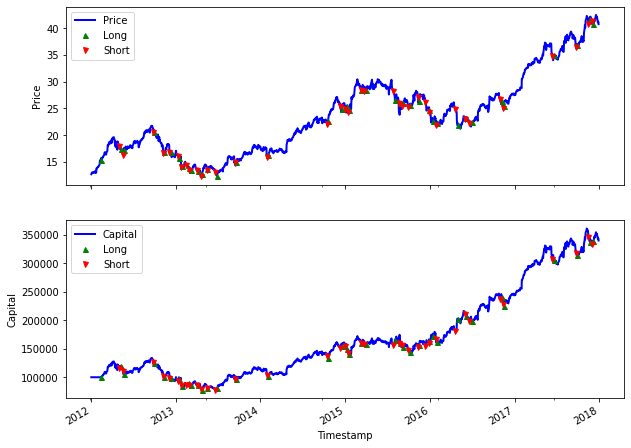

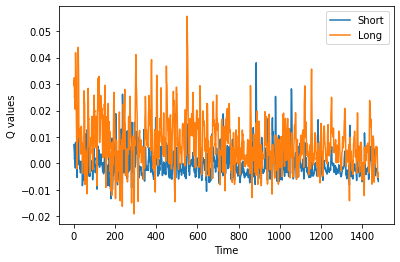

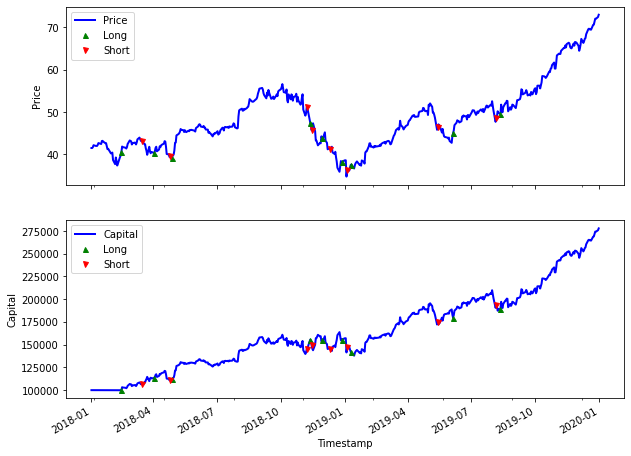

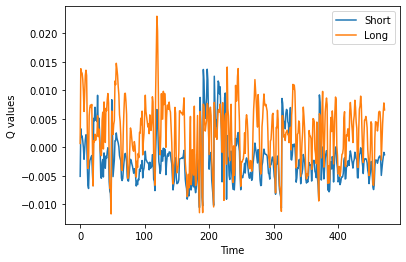

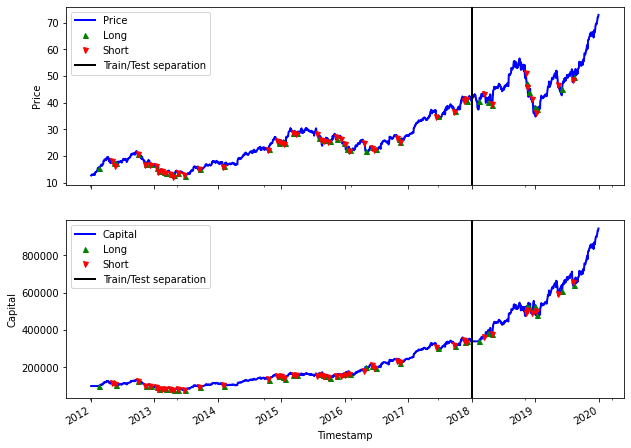

In [ ]:
if(__name__ == '__main__'):

    # Retrieve the paramaters sent by the user
   # parser = argparse.ArgumentParser(description='')
   # parser.add_argument("-strategy", default='TDQN', type=str, help="Name of the trading strategy")
   # parser.add_argument("-stock", default='Apple', type=str, help="Name of the stock (market)")
   # args = parser.parse_args()
    
    # Initialization of the required variables
    simulator = TradingSimulator()
    strategy = "TDQN"
    #strategy = "Buy and Hold"
    stock = "Apple"

    # Training and testing of the trading strategy specified for the stock (market) specified
    #simulator.simulateNewStrategy(strategy, stock, saveStrategy=True)
    simulator.simulateExistingStrategy(strategy, stock)
    """
    simulator.displayTestbench()
    simulator.analyseTimeSeries(stock)
    simulator.simulateNewStrategy(strategy, stock, saveStrategy=False)
    simulator.simulateExistingStrategy(strategy, stock)
    simulator.evaluateStrategy(strategy, saveStrategy=False)
    simulator.evaluateStock(stock)
    """